In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 불러오기

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DArt-B 6기/학술제-F&B/최종본/df_7(3)_merged.csv', encoding='utf-8')

In [ ]:
import matplotlib.font_manager as fm

font_path = '/content/drive/MyDrive/DArt-B 6기/학술제-F&B/NanumBarunGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

fm.fontManager.addfont(font_path)

In [ ]:
for col in df.columns:
    print(col)

기준_년분기_코드
상권_구분_코드
상권_구분_코드_명
상권_코드
상권_코드_명
상권_변화_지표
상권_변화_지표_명
운영_영업_개월_평균
폐업_영업_개월_평균
서울_운영_영업_개월_평균
서울_폐업_영업_개월_평균
총_유동인구_수
남성_유동인구_수
여성_유동인구_수
연령대_10_유동인구_수
연령대_20_유동인구_수
연령대_30_유동인구_수
연령대_40_유동인구_수
연령대_50_유동인구_수
연령대_60_이상_유동인구_수
시간대_00_06_유동인구_수
시간대_06_11_유동인구_수
시간대_11_14_유동인구_수
시간대_14_17_유동인구_수
시간대_17_21_유동인구_수
시간대_21_24_유동인구_수
월요일_유동인구_수
화요일_유동인구_수
수요일_유동인구_수
목요일_유동인구_수
금요일_유동인구_수
토요일_유동인구_수
일요일_유동인구_수
총_직장_인구_수
남성_직장_인구_수
여성_직장_인구_수
연령대_10_직장_인구_수
연령대_20_직장_인구_수
연령대_30_직장_인구_수
연령대_40_직장_인구_수
연령대_50_직장_인구_수
연령대_60_이상_직장_인구_수
남성연령대_10_직장_인구_수
남성연령대_20_직장_인구_수
남성연령대_30_직장_인구_수
남성연령대_40_직장_인구_수
남성연령대_50_직장_인구_수
남성연령대_60_이상_직장_인구_수
여성연령대_10_직장_인구_수
여성연령대_20_직장_인구_수
여성연령대_30_직장_인구_수
여성연령대_40_직장_인구_수
여성연령대_50_직장_인구_수
여성연령대_60_이상_직장_인구_수
총_상주인구_수
남성_상주인구_수
여성_상주인구_수
연령대_10_상주인구_수
연령대_20_상주인구_수
연령대_30_상주인구_수
연령대_40_상주인구_수
연령대_50_상주인구_수
연령대_60_이상_상주인구_수
남성연령대_10_상주인구_수
남성연령대_20_상주인구_수
남성연령대_30_상주인구_수
남성연령대_40_상주인구_수
남성연령대_50_상주인구_수
남성연령대_60_이상_상주인구_수
여성연령대_10_상주인구_수
여성연령대_20_상주인구_수
여성연령대

In [ ]:
keep_cols = [
    "상권_코드", "상권_코드_명",
    "총_유동인구_수", "남성_유동인구_수", "여성_유동인구_수",
    "연령대_10_유동인구_수", "연령대_20_유동인구_수", "연령대_30_유동인구_수",
    "연령대_40_유동인구_수", "연령대_50_유동인구_수", "연령대_60_이상_유동인구_수",
    "시간대_00_06_유동인구_수", "시간대_06_11_유동인구_수", "시간대_11_14_유동인구_수",
    "시간대_14_17_유동인구_수", "시간대_17_21_유동인구_수", "시간대_21_24_유동인구_수",
    "월요일_유동인구_수", "화요일_유동인구_수", "수요일_유동인구_수",
    "목요일_유동인구_수", "금요일_유동인구_수", "토요일_유동인구_수", "일요일_유동인구_수",
    "총_직장_인구_수", "남성_직장_인구_수", "여성_직장_인구_수",
    "연령대_10_직장_인구_수", "연령대_20_직장_인구_수", "연령대_30_직장_인구_수",
    "연령대_40_직장_인구_수", "연령대_50_직장_인구_수", "연령대_60_이상_직장_인구_수",
    "남성연령대_10_직장_인구_수", "남성연령대_20_직장_인구_수", "남성연령대_30_직장_인구_수",
    "남성연령대_40_직장_인구_수", "남성연령대_50_직장_인구_수", "남성연령대_60_이상_직장_인구_수",
    "여성연령대_10_직장_인구_수", "여성연령대_20_직장_인구_수", "여성연령대_30_직장_인구_수",
    "여성연령대_40_직장_인구_수", "여성연령대_50_직장_인구_수", "여성연령대_60_이상_직장_인구_수",
    "총_상주인구_수", "남성_상주인구_수", "여성_상주인구_수",
    "연령대_10_상주인구_수", "연령대_20_상주인구_수", "연령대_30_상주인구_수",
    "연령대_40_상주인구_수", "연령대_50_상주인구_수", "연령대_60_이상_상주인구_수",
    "남성연령대_10_상주인구_수", "남성연령대_20_상주인구_수", "남성연령대_30_상주인구_수",
    "남성연령대_40_상주인구_수", "남성연령대_50_상주인구_수", "남성연령대_60_이상_상주인구_수",
    "여성연령대_10_상주인구_수", "여성연령대_20_상주인구_수", "여성연령대_30_상주인구_수",
    "여성연령대_40_상주인구_수", "여성연령대_50_상주인구_수", "여성연령대_60_이상_상주인구_수",
    "cluster", "평균_점포당_조정_매출"
]

In [ ]:
df = df[keep_cols].copy()

In [ ]:
df = df[[col for col in keep_cols if col in df.columns]].copy()

In [ ]:
df.describe()

,상권_코드,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,...,남성연령대_50_상주인구_수,남성연령대_60_이상_상주인구_수,여성연령대_10_상주인구_수,여성연령대_20_상주인구_수,여성연령대_30_상주인구_수,여성연령대_40_상주인구_수,여성연령대_50_상주인구_수,여성연령대_60_이상_상주인구_수,cluster,평균_점포당_조정_매출
count,1.026000e+03,1.026000e+03,1.026000e+03,1.026000e+03,1026.000000,1.026000e+03,1.026000e+03,1.026000e+03,1.026000e+03,1.026000e+03,...,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1.026000e+03
mean,3.115177e+06,1.103740e+06,5.231891e+05,5.805511e+05,137331.408382,2.017559e+05,1.968280e+05,1.805595e+05,1.611525e+05,2.261130e+05,...,227.268031,353.844055,129.551657,296.072125,251.020468,196.095517,223.121832,417.607212,1.378168,1.392768e+07
std,1.137345e+04,9.787713e+05,4.736006e+05,5.094974e+05,120732.234820,2.520205e+05,2.057891e+05,1.709087e+05,1.401313e+05,1.942177e+05,...,187.794671,298.820460,127.783581,311.339790,245.214034,176.465108,195.196351,362.009417,2.465621,3.410385e+07
min,3.001491e+06,2.146000e+03,1.353000e+03,7.930000e+02,1.000000,3.600000e+01,4.330000e+02,5.310000e+02,4.720000e+02,6.730000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.992510e+05
25%,3.110420e+06,4.524222e+05,2.120580e+05,2.335120e+05,52014.000000,6.088300e+04,6.919050e+04,7.347975e+04,6.707675e+04,9.080800e+04,...,83.000000,127.250000,41.250000,92.000000,83.000000,69.000000,74.000000,138.000000,0.000000,6.626778e+06
50%,3.110867e+06,8.562800e+05,4.022245e+05,4.501040e+05,100527.500000,1.290155e+05,1.413100e+05,1.357735e+05,1.253415e+05,1.774390e+05,...,176.500000,270.000000,91.500000,201.000000,173.000000,149.500000,165.000000,310.000000,0.000000,9.838842e+06
75%,3.120148e+06,1.467202e+06,6.924682e+05,7.769730e+05,185681.000000,2.457360e+05,2.453635e+05,2.371920e+05,2.157012e+05,3.071150e+05,...,322.500000,505.750000,183.000000,382.500000,339.000000,277.750000,314.750000,609.000000,2.000000,1.461301e+07
max,3.130326e+06,8.476380e+06,4.475812e+06,4.000568e+06,800881.000000,3.053526e+06,1.993866e+06,1.704350e+06,1.473359e+06,1.931431e+06,...,1362.000000,1879.000000,1387.000000,3153.000000,1970.000000,1411.000000,1470.000000,2466.000000,9.000000,9.618788e+08


In [ ]:
for col in df.columns:
    print(col)

상권_코드
상권_코드_명
총_유동인구_수
남성_유동인구_수
여성_유동인구_수
연령대_10_유동인구_수
연령대_20_유동인구_수
연령대_30_유동인구_수
연령대_40_유동인구_수
연령대_50_유동인구_수
연령대_60_이상_유동인구_수
시간대_00_06_유동인구_수
시간대_06_11_유동인구_수
시간대_11_14_유동인구_수
시간대_14_17_유동인구_수
시간대_17_21_유동인구_수
시간대_21_24_유동인구_수
월요일_유동인구_수
화요일_유동인구_수
수요일_유동인구_수
목요일_유동인구_수
금요일_유동인구_수
토요일_유동인구_수
일요일_유동인구_수
총_직장_인구_수
남성_직장_인구_수
여성_직장_인구_수
연령대_10_직장_인구_수
연령대_20_직장_인구_수
연령대_30_직장_인구_수
연령대_40_직장_인구_수
연령대_50_직장_인구_수
연령대_60_이상_직장_인구_수
남성연령대_10_직장_인구_수
남성연령대_20_직장_인구_수
남성연령대_30_직장_인구_수
남성연령대_40_직장_인구_수
남성연령대_50_직장_인구_수
남성연령대_60_이상_직장_인구_수
여성연령대_10_직장_인구_수
여성연령대_20_직장_인구_수
여성연령대_30_직장_인구_수
여성연령대_40_직장_인구_수
여성연령대_50_직장_인구_수
여성연령대_60_이상_직장_인구_수
총_상주인구_수
남성_상주인구_수
여성_상주인구_수
연령대_10_상주인구_수
연령대_20_상주인구_수
연령대_30_상주인구_수
연령대_40_상주인구_수
연령대_50_상주인구_수
연령대_60_이상_상주인구_수
남성연령대_10_상주인구_수
남성연령대_20_상주인구_수
남성연령대_30_상주인구_수
남성연령대_40_상주인구_수
남성연령대_50_상주인구_수
남성연령대_60_이상_상주인구_수
여성연령대_10_상주인구_수
여성연령대_20_상주인구_수
여성연령대_30_상주인구_수
여성연령대_40_상주인구_수
여성연령대_50_상주인구_수
여성연령대_60_이상_상주인구_수
cluster
평균_점포당_조정_매출


# 미정 자동화 코드

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


###########################################
# 1) 업종별 클러스터 맵핑
###########################################
cluster_map = {
    "한식": [0],
    "양식": [1,2,5,6,7,8],
    "일식": [1,2,4,6,7,9],
    "중식": [1,2,4,6,7],
    "분식": [0,4,9],
    "치킨": [0,4],
    "커피": [2,4,5,7,8,9],
    "제과점": [0,4,6],
    "패스트푸드": [1,2,3,4,9],
    "호프-간이주점": [0,1,7,8]
}


###########################################
# 2) 다중공선성 제거 함수
###########################################
def remove_high_corr(df, threshold=0.90):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    df_clean = df.drop(columns=to_drop, errors='ignore')
    return df_clean, to_drop


def calculate_vif(df):
    vif_df = pd.DataFrame()
    vif_df["variable"] = df.columns
    vif_df["VIF"] = [
        variance_inflation_factor(df.values, i) if df.values[:, i].var() != 0 else 0
        for i in range(df.shape[1])
    ]
    return vif_df


def remove_high_vif(df, threshold=10):
    removed = []
    while True:
        vif_df = calculate_vif(df)
        max_vif = vif_df["VIF"].max()
        if max_vif > threshold:
            col_to_drop = vif_df.loc[vif_df["VIF"].idxmax(), "variable"]
            df = df.drop(columns=[col_to_drop])
            removed.append(col_to_drop)
        else:
            break
    return df, removed


###########################################
# 3) 업종별 자동 변수선택 함수
###########################################
def select_variables_for_category(category_name, df):

    print(f"\n\n============================")
    print(f"📍 업종: {category_name}")
    print(f"============================")

    clusters = cluster_map[category_name]

    # 업종 상권 필터링
    df_cat = df[df["cluster"].isin(clusters)].copy()

    # 종속변수 / 독립변수
    y = df_cat["평균_점포당_조정_매출"]
    X = df_cat.select_dtypes(include=[np.number]).drop(columns=["상권_코드", "cluster", "평균_점포당_조정_매출"])

    ###########################################
    # (1) 상관관계 기반 제거
    ###########################################
    X_corr_removed, corr_dropped = remove_high_corr(X)

    ###########################################
    # (2) VIF 기반 제거
    ###########################################
    X_vif_removed, vif_dropped = remove_high_vif(X_corr_removed)

    ###########################################
    # (3) RandomForest 중요도
    ###########################################
    rf = RandomForestRegressor(n_estimators=400, random_state=42)
    rf.fit(X_vif_removed, y)

    rf_importance = pd.Series(rf.feature_importances_, index=X_vif_removed.columns)
    rf_top = set(rf_importance.sort_values(ascending=False).head(int(len(rf_importance)*0.2)).index)

    ###########################################
    # (4) Permutation Importance
    ###########################################
    perm = permutation_importance(rf, X_vif_removed, y, n_repeats=15, random_state=42)
    perm_importance = pd.Series(perm.importances_mean, index=X_vif_removed.columns)
    perm_top = set(perm_importance.sort_values(ascending=False).head(int(len(perm_importance)*0.2)).index)

    ###########################################
    # (5) Lasso Regression
    ###########################################
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_vif_removed)

    lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)
    coef = pd.Series(lasso.coef_, index=X_vif_removed.columns)
    lasso_top = set(coef[coef != 0].index)

    ###########################################
    # (6) OLS Regression (p-value)
    ###########################################
    X_ols = sm.add_constant(X_vif_removed)
    model = sm.OLS(y, X_ols).fit()
    pvalues = model.pvalues.drop("const")
    ols_top = set(pvalues[pvalues < 0.05].index)

    ###########################################
    # (7) 최종 선정 기준 (4개 중 2개 이상)
    ###########################################
    variable_scores = {}

    for var in X_vif_removed.columns:
        score = 0
        if var in rf_top: score += 1
        if var in perm_top: score += 1
        if var in lasso_top: score += 1
        if var in ols_top: score += 1
        variable_scores[var] = score

    final_vars = [var for var, s in variable_scores.items() if s >= 2]

    ###########################################
    # (8) 결과 출력
    ###########################################
    print("\n📌 제거된 변수 목록 (상관계수 기준):", corr_dropped)
    print("📌 제거된 변수 목록 (VIF 기준):", vif_dropped)

    print("\n📌 최종 중요 변수(2개 이상 기준 충족):")
    print(final_vars)

    return {
        "category": category_name,
        "final_variables": final_vars,
        "rf_top": rf_top,
        "perm_top": perm_top,
        "lasso_top": lasso_top,
        "ols_top": ols_top,
        "removed_corr": corr_dropped,
        "removed_vif": vif_dropped
    }


In [ ]:
# ============================================
# 1) 업종별 변수 선택 결과 수집
# ============================================

category_results = []

for category_name in cluster_map.keys():
    res = select_variables_for_category(category_name, df)
    category_results.append(res)

# ============================================
# 2) 업종별 요약 테이블(summary_df) 생성
# ============================================

summary_rows = []

for res in category_results:
    summary_rows.append({
        "업종": res["category"],
        "최종_변수_수": len(res["final_variables"]),
        "최종_선정_변수": ", ".join(res["final_variables"]),
        "RF_상위_변수": ", ".join(sorted(list(res["rf_top"]))),
        "Permutation_상위_변수": ", ".join(sorted(list(res["perm_top"]))),
        "Lasso_선정_변수": ", ".join(sorted(list(res["lasso_top"]))),
        "OLS_p<0.05_변수": ", ".join(sorted(list(res["ols_top"]))),
        "상관계수로_제거된_변수": ", ".join(res["removed_corr"]),
        "VIF로_제거된_변수": ", ".join(res["removed_vif"])
    })

summary_df = pd.DataFrame(summary_rows)

print("📌 업종별 변수 선택 요약 테이블 (summary_df)")
display(summary_df)


# ============================================
# 3) 업종별 상세 테이블(detail_df) 생성
#    - 각 변수별로 RF/Perm/Lasso/OLS 기준 충족 여부 + 점수
# ============================================

detail_rows = []

for res in category_results:
    category_name = res["category"]
    rf_top = res["rf_top"]
    perm_top = res["perm_top"]
    lasso_top = res["lasso_top"]
    ols_top = res["ols_top"]
    final_vars = set(res["final_variables"])

    # 네 가지 기준 중 하나라도 만족한 변수 전체 집합
    all_vars = set().union(rf_top, perm_top, lasso_top, ols_top)

    for var in all_vars:
        rf_flag = int(var in rf_top)
        perm_flag = int(var in perm_top)
        lasso_flag = int(var in lasso_top)
        ols_flag = int(var in ols_top)
        score = rf_flag + perm_flag + lasso_flag + ols_flag

        detail_rows.append({
            "업종": category_name,
            "변수명": var,
            "RF_상위": rf_flag,
            "Permutation_상위": perm_flag,
            "Lasso_선정": lasso_flag,
            "OLS_p<0.05": ols_flag,
            "총_기준_충족_개수": score,
            "최종_선정_변수_여부": int(var in final_vars)
        })

detail_df = pd.DataFrame(detail_rows)

print("📌 업종별 변수 중요도 상세 테이블 (detail_df)")
display(detail_df)


# ============================================
# 4) 필요시 CSV로 저장 (경로는 너가 원하는 대로 바꿔줘)
# ============================================

# summary_df.to_csv("/content/drive/MyDrive/업종별_변수선택_요약.csv", index=False, encoding="utf-8-sig")
# detail_df.to_csv("/content/drive/MyDrive/업종별_변수선택_상세.csv", index=False, encoding="utf-8-sig")




📍 업종: 한식

📌 제거된 변수 목록 (상관계수 기준): ['남성_유동인구_수', '여성_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수', '시간대_00_06_유동인구_수', '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수', '시간대_14_17_유동인구_수', '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수', '월요일_유동인구_수', '화요일_유동인구_수', '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수', '남성_직장_인구_수', '여성_직장_인구_수', '연령대_20_직장_인구_수', '연령대_30_직장_인구_수', '연령대_40_직장_인구_수', '연령대_50_직장_인구_수', '남성연령대_10_직장_인구_수', '남성연령대_20_직장_인구_수', '남성연령대_30_직장_인구_수', '남성연령대_40_직장_인구_수', '남성연령대_50_직장_인구_수', '남성연령대_60_이상_직장_인구_수', '여성연령대_10_직장_인구_수', '여성연령대_20_직장_인구_수', '여성연령대_30_직장_인구_수', '여성연령대_40_직장_인구_수', '여성연령대_50_직장_인구_수', '여성연령대_60_이상_직장_인구_수', '남성_상주인구_수', '여성_상주인구_수', '연령대_10_상주인구_수', '연령대_30_상주인구_수', '연령대_40_상주인구_수', '연령대_50_상주인구_수', '연령대_60_이상_상주인구_수', '남성연령대_10_상주인구_수', '남성연령대_20_상주인구_수', '남성연령대_30_상주인구_수', '남성연령대_40_상주인구_수', '남성연령대_50_상주인구_수', '남성연령대_60_이상_상주인구_수', '여성연령대_10_상주인구_수', '여성연령대_20_상주인구_수', '여성연령대_30_상주인구_수', '여성연령대_40_상주인구_

,업종,최종_변수_수,최종_선정_변수,RF_상위_변수,Permutation_상위_변수,Lasso_선정_변수,OLS_p<0.05_변수,상관계수로_제거된_변수,VIF로_제거된_변수
0,한식,1,연령대_10_유동인구_수,연령대_10_유동인구_수,연령대_10_유동인구_수,"연령대_10_유동인구_수, 연령대_10_직장_인구_수, 연령대_20_상주인구_수, ...",연령대_10_유동인구_수,"남성_유동인구_수, 여성_유동인구_수, 연령대_30_유동인구_수, 연령대_40_유동...","총_유동인구_수, 총_상주인구_수"
1,양식,2,"연령대_20_유동인구_수, 연령대_20_상주인구_수",연령대_20_유동인구_수,연령대_20_유동인구_수,"연령대_10_유동인구_수, 연령대_20_상주인구_수, 연령대_20_유동인구_수, 총...",연령대_20_상주인구_수,"남성_유동인구_수, 여성_유동인구_수, 연령대_30_유동인구_수, 연령대_40_유동...","총_상주인구_수, 총_유동인구_수, 시간대_00_06_유동인구_수"
2,일식,1,연령대_20_상주인구_수,연령대_20_상주인구_수,연령대_20_상주인구_수,"연령대_10_상주인구_수, 연령대_10_유동인구_수, 연령대_20_상주인구_수, 연...",,"남성_유동인구_수, 여성_유동인구_수, 연령대_30_유동인구_수, 연령대_40_유동...","총_상주인구_수, 총_유동인구_수, 시간대_00_06_유동인구_수"
3,중식,1,연령대_20_유동인구_수,연령대_20_유동인구_수,연령대_20_유동인구_수,"연령대_10_상주인구_수, 연령대_10_유동인구_수, 연령대_20_상주인구_수, 연...",,"남성_유동인구_수, 여성_유동인구_수, 연령대_30_유동인구_수, 연령대_40_유동...","총_상주인구_수, 총_유동인구_수, 시간대_00_06_유동인구_수"
4,분식,1,연령대_10_유동인구_수,연령대_10_유동인구_수,연령대_10_유동인구_수,"연령대_10_상주인구_수, 연령대_10_유동인구_수, 연령대_20_상주인구_수, 연...",,"남성_유동인구_수, 여성_유동인구_수, 연령대_30_유동인구_수, 연령대_40_유동...","총_상주인구_수, 총_유동인구_수"
5,치킨,1,연령대_10_유동인구_수,연령대_10_유동인구_수,연령대_10_유동인구_수,"연령대_10_상주인구_수, 연령대_10_유동인구_수, 연령대_20_상주인구_수, 연...",,"남성_유동인구_수, 여성_유동인구_수, 연령대_30_유동인구_수, 연령대_40_유동...","총_상주인구_수, 총_유동인구_수"
6,커피,1,연령대_20_유동인구_수,연령대_20_유동인구_수,연령대_20_유동인구_수,"연령대_10_상주인구_수, 연령대_10_유동인구_수, 연령대_20_상주인구_수, 연...",,"남성_유동인구_수, 여성_유동인구_수, 연령대_30_유동인구_수, 연령대_40_유동...","총_상주인구_수, 총_유동인구_수, 시간대_00_06_유동인구_수"
7,제과점,1,연령대_10_유동인구_수,연령대_10_유동인구_수,연령대_10_유동인구_수,"연령대_10_상주인구_수, 연령대_10_유동인구_수, 연령대_20_상주인구_수, 연...",,"남성_유동인구_수, 여성_유동인구_수, 연령대_30_유동인구_수, 연령대_40_유동...","총_상주인구_수, 총_유동인구_수"
8,패스트푸드,1,연령대_20_유동인구_수,연령대_20_유동인구_수,연령대_20_유동인구_수,,,"남성_유동인구_수, 여성_유동인구_수, 연령대_30_유동인구_수, 연령대_40_유동...","총_상주인구_수, 총_유동인구_수, 연령대_30_상주인구_수"
9,호프-간이주점,1,연령대_10_유동인구_수,연령대_10_유동인구_수,연령대_10_유동인구_수,"연령대_10_상주인구_수, 연령대_10_유동인구_수, 연령대_20_상주인구_수, 연...",,"남성_유동인구_수, 여성_유동인구_수, 연령대_30_유동인구_수, 연령대_40_유동...","총_상주인구_수, 총_유동인구_수, 시간대_00_06_유동인구_수"


📌 업종별 변수 중요도 상세 테이블 (detail_df)


,업종,변수명,RF_상위,Permutation_상위,Lasso_선정,OLS_p<0.05,총_기준_충족_개수,최종_선정_변수_여부
0,한식,총_직장_인구_수,0,0,1,0,1,0
1,한식,연령대_10_유동인구_수,1,1,1,1,4,1
2,한식,연령대_10_직장_인구_수,0,0,1,0,1,0
3,한식,연령대_20_상주인구_수,0,0,1,0,1,0
4,양식,연령대_20_유동인구_수,1,1,1,0,3,1
5,양식,총_직장_인구_수,0,0,1,0,1,0
6,양식,연령대_10_유동인구_수,0,0,1,0,1,0
7,양식,연령대_20_상주인구_수,0,0,1,1,2,1
8,일식,연령대_10_상주인구_수,0,0,1,0,1,0
9,일식,연령대_20_유동인구_수,0,0,1,0,1,0


In [ ]:
# ============================================
# 업종별 중요 변수 상위 3개 출력
# 기준: 총_기준_충족_개수 (많을수록 중요)
# ============================================

top3_rows = []

for category in detail_df["업종"].unique():
    df_cat = detail_df[detail_df["업종"] == category]

    # 최종 선정 변수만 대상으로 상위 3개 추출
    df_cat_final = df_cat[df_cat["최종_선정_변수_여부"] == 1]
    df_cat_top3 = df_cat_final.sort_values("총_기준_충족_개수", ascending=False).head(3)

    for _, row in df_cat_top3.iterrows():
        top3_rows.append({
            "업종": category,
            "변수명": row["변수명"],
            "총_기준_충족_개수": row["총_기준_충족_개수"],
            "RF_상위": row["RF_상위"],
            "Permutation_상위": row["Permutation_상위"],
            "Lasso_선정": row["Lasso_선정"],
            "OLS_p<0.05": row["OLS_p<0.05"]
        })

top3_df = pd.DataFrame(top3_rows)

print("📌 업종별 최종 중요변수 상위 3개")
display(top3_df)


# ============================================
# 필요시 CSV 저장
# ============================================
# top3_df.to_csv("/content/drive/MyDrive/업종별_중요변수_TOP3.csv", index=False, encoding="utf-8-sig")


📌 업종별 최종 중요변수 상위 3개


,업종,변수명,총_기준_충족_개수,RF_상위,Permutation_상위,Lasso_선정,OLS_p<0.05
0,한식,연령대_10_유동인구_수,4,1,1,1,1
1,양식,연령대_20_유동인구_수,3,1,1,1,0
2,양식,연령대_20_상주인구_수,2,0,0,1,1
3,일식,연령대_20_상주인구_수,3,1,1,1,0
4,중식,연령대_20_유동인구_수,3,1,1,1,0
5,분식,연령대_10_유동인구_수,3,1,1,1,0
6,치킨,연령대_10_유동인구_수,3,1,1,1,0
7,커피,연령대_20_유동인구_수,3,1,1,1,0
8,제과점,연령대_10_유동인구_수,3,1,1,1,0
9,패스트푸드,연령대_20_유동인구_수,2,1,1,0,0


In [ ]:
# =======================================================
# 업종별 중요변수 TOP3 정확히 출력하는 코드
# =======================================================

top3_rows = []

for category in detail_df["업종"].unique():

    # 해당 업종 데이터만 추출
    df_cat = detail_df[detail_df["업종"] == category]

    # 최종 선정된 변수만 대상
    df_final = df_cat[df_cat["최종_선정_변수_여부"] == 1]

    # 총 기준 충족 개수 기준으로 내림차순 정렬
    df_sorted = df_final.sort_values(
        by="총_기준_충족_개수",
        ascending=False
    )

    # 업종별 TOP 3 추출
    df_top3 = df_sorted.head(3)

    # 결과 저장
    for _, row in df_top3.iterrows():
        top3_rows.append({
            "업종": category,
            "변수명": row["변수명"],
            "총_기준_충족_개수": row["총_기준_충족_개수"]
        })

# 최종 결과 테이블
top3_per_category = pd.DataFrame(top3_rows)

print("📌 업종별 중요변수 TOP 3")
display(top3_per_category)


📌 업종별 중요변수 TOP 3


,업종,변수명,총_기준_충족_개수
0,한식,연령대_10_유동인구_수,4
1,양식,연령대_20_유동인구_수,3
2,양식,연령대_20_상주인구_수,2
3,일식,연령대_20_상주인구_수,3
4,중식,연령대_20_유동인구_수,3
5,분식,연령대_10_유동인구_수,3
6,치킨,연령대_10_유동인구_수,3
7,커피,연령대_20_유동인구_수,3
8,제과점,연령대_10_유동인구_수,3
9,패스트푸드,연령대_20_유동인구_수,2


In [ ]:
# ================================================================
#   업종별 변수 중요도 TOP3 산출 - A버전 + B버전 + 비교 출력
# ================================================================

import pandas as pd

# 결과 저장용 리스트
top3_A_rows = []   # 기준 완화 버전(A)
top3_B_rows = []   # 기준 무시 버전(B)

# 모든 업종 리스트
categories = detail_df["업종"].unique()

# ================================================================
# A버전 — 기준 완화 (1개 이상 기준 충족 변수 중 TOP 3)
# ================================================================

for category in categories:
    df_cat = detail_df[detail_df["업종"] == category]

    # 기준 완화: 총 기준 충족 개수가 1개 이상인 변수만 선정
    df_A = df_cat[df_cat["총_기준_충족_개수"] >= 1]

    # 상위 3개
    df_A_top3 = df_A.sort_values(
        by="총_기준_충족_개수",
        ascending=False
    ).head(3)

    for _, row in df_A_top3.iterrows():
        top3_A_rows.append({
            "업종": category,
            "변수명": row["변수명"],
            "총_기준_충족_개수": row["총_기준_충족_개수"]
        })

top3_A = pd.DataFrame(top3_A_rows)



# ================================================================
# B버전 — 최종 선정 기준을 무시하고 점수 기준 TOP 3만 뽑기 (권장)
# ================================================================

for category in categories:
    df_cat = detail_df[detail_df["업종"] == category]

    # 기준 무시: 모든 변수 중 점수 기준 내림차순
    df_B_top3 = df_cat.sort_values(
        by="총_기준_충족_개수",
        ascending=False
    ).head(3)

    for _, row in df_B_top3.iterrows():
        top3_B_rows.append({
            "업종": category,
            "버전": "B_기준무시",
            "변수명": row["변수명"],
            "총_기준_충족_개수": row["총_기준_충족_개수"]
        })

top3_B = pd.DataFrame(top3_B_rows)

# ================================================================
# 업종별 버전별 테이블을 개별로도 출력하고 싶다면:
# ================================================================

print("\n\n📌 업종별 TOP3 인구 변수")
display(top3_A)

# ============================================
# 필요시 CSV 저장
# ============================================
top3_A.to_csv("/content/업종별_인구_TOP3.csv", index=False, encoding="utf-8-sig")



📌 업종별 TOP3 인구 변수


,업종,변수명,총_기준_충족_개수
0,한식,연령대_10_유동인구_수,4
1,한식,총_직장_인구_수,1
2,한식,연령대_10_직장_인구_수,1
3,양식,연령대_20_유동인구_수,3
4,양식,연령대_20_상주인구_수,2
5,양식,총_직장_인구_수,1
6,일식,연령대_20_상주인구_수,3
7,일식,연령대_10_상주인구_수,1
8,일식,연령대_20_유동인구_수,1
9,중식,연령대_20_유동인구_수,3


# 새 섹션

# 1단계: 비중화 & PCA 분석

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ------------ 업종별 클러스터 매핑 ------------

industry_cluster_map = {
    "한식":        [0],
    "양식":        [1, 2, 5, 6, 7, 8],
    "일식":        [1, 2, 4, 6, 7, 9],
    "중식":        [1, 2, 4, 6, 7],
    "분식":        [0, 4, 9],
    "치킨":        [0, 4],
    "커피":        [2, 4, 5, 7, 8, 9],
    "제과점":      [0, 4, 6],
    "패스트푸드":  [1, 2, 3, 4, 9],
    "호프-간이주점": [0, 1, 7, 8],
}

CLUSTER_COL = "cluster"   # 클러스터 번호 컬럼명 (필요하면 바꿔줘)

def filter_by_industry(df, industry_name):
    """
    업종명을 넣으면, 그 업종에 해당하는 클러스터 상권만 필터링해서 반환.
    (df에는 업종 컬럼이 없고, Cluster만 있다고 가정)
    """
    clusters = industry_cluster_map[industry_name]
    df_sub = df[df[CLUSTER_COL].isin(clusters)].copy()
    print(f"[{industry_name}] 사용 클러스터: {clusters} / 선택된 상권 수: {len(df_sub)}")
    return df_sub

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def add_ratio_features(df):
    """
    df에 아래 비중 컬럼들을 추가:
    - 연령대_*_유동인구_비중
    - 시간대_*_유동인구_비중
    - 요일별 유동인구 비중
    - 직장/상주/유동 구조 비중 + 상주_유동_비율
    """
    df = df.copy()

    # -----------------------
    # 1) 연령대 유동 비중
    # -----------------------
    age_cols_pop_all = [
        "연령대_10_유동인구_수", "연령대_20_유동인구_수", "연령대_30_유동인구_수",
        "연령대_40_유동인구_수", "연령대_50_유동인구_수", "연령대_60_이상_유동인구_수"
    ]
    age_cols_pop = [c for c in age_cols_pop_all if c in df.columns]
    if len(age_cols_pop) > 0:
        age_sum = df[age_cols_pop].sum(axis=1).replace(0, np.nan)
        for col in age_cols_pop:
            # 이름 패턴이 조금 달라도 안전하게: "_유동인구_수" 있으면 그 부분만 바꾸고,
            # 없으면 그냥 "_비중" 붙여주기
            if "_유동인구_수" in col:
                ratio_col = col.replace("_유동인구_수", "_유동인구_비중")
            else:
                ratio_col = col + "_비중"
            df[ratio_col] = df[col] / age_sum
        print(f"✅ 연령대 비중 컬럼 생성: {len(age_cols_pop)}개 사용")
    else:
        print("⚠ 연령대 유동인구 컬럼이 없어 비중을 생성하지 않았습니다.")

    # -----------------------
    # 2) 시간대 유동 비중
    # -----------------------
    time_cols_pop_all = [
        "시간대_00_06_유동인구_수", "시간대_06_11_유동인구_수", "시간대_11_14_유동인구_수",
        "시간대_14_17_유동인구_수", "시간대_17_21_유동인구_수", "시간대_21_24_유동인구_수"
    ]
    time_cols_pop = [c for c in time_cols_pop_all if c in df.columns]
    if len(time_cols_pop) > 0:
        time_sum = df[time_cols_pop].sum(axis=1).replace(0, np.nan)
        for col in time_cols_pop:
            if "_유동인구_수" in col:
                ratio_col = col.replace("_유동인구_수", "_유동인구_비중")
            else:
                ratio_col = col + "_비중"
            df[ratio_col] = df[col] / time_sum
        print(f"✅ 시간대 비중 컬럼 생성: {len(time_cols_pop)}개 사용")
    else:
        print("⚠ 시간대 유동인구 컬럼이 없어 비중을 생성하지 않았습니다.")

    # -----------------------
    # 3) 요일 유동 비중
    # -----------------------
    weekday_cols_pop_all = [
        "월요일_유동인구_수", "화요일_유동인구_수", "수요일_유동인구_수",
        "목요일_유동인구_수", "금요일_유동인구_수", "토요일_유동인구_수", "일요일_유동인구_수"
    ]
    weekday_cols_pop = [c for c in weekday_cols_pop_all if c in df.columns]
    if len(weekday_cols_pop) > 0:
        weekday_sum = df[weekday_cols_pop].sum(axis=1).replace(0, np.nan)
        for col in weekday_cols_pop:
            if "_유동인구_수" in col:
                ratio_col = col.replace("_유동인구_수", "_유동인구_비중")
            else:
                ratio_col = col + "_비중"
            df[ratio_col] = df[col] / weekday_sum
        print(f"✅ 요일 비중 컬럼 생성: {len(weekday_cols_pop)}개 사용")
    else:
        print("⚠ 요일별 유동인구 컬럼이 없어 비중을 생성하지 않았습니다.")

    # -----------------------
    # 4) 직장/상주/유동 구조 비중 + 상주_유동_비율
    # -----------------------
    need_cols = ["총_유동인구_수", "총_상주인구_수", "총_직장_인구_수"]
    if all(c in df.columns for c in need_cols):
        total_pop = (
            df["총_유동인구_수"].fillna(0) +
            df["총_상주인구_수"].fillna(0) +
            df["총_직장_인구_수"].fillna(0)
        )
        total_pop = total_pop.replace(0, np.nan)

        df["직장인_비중(전체인구)"]   = df["총_직장_인구_수"] / total_pop
        df["상주인_비중(전체인구)"]   = df["총_상주인구_수"] / total_pop
        df["유동인구_비중(전체인구)"] = df["총_유동인구_수"] / total_pop

        denom_float = df["총_유동인구_수"].replace(0, np.nan)
        df["상주_유동_비율"] = (df["총_상주인구_수"] / denom_float).fillna(0)

        print("✅ 직장/상주/유동 비중 + 상주_유동_비율 생성 완료")
    else:
        print(f"⚠ 직장/상주/유동 구조 비중을 만들기 위한 컬럼이 부족합니다: {need_cols}")

    return df

연령대 유동인구 비중: 연령대_x_유동인구_비중 = 연령대_x_유동인구_수 / 연령대_합

시간대 유동인구 비중: 시간대_x_유동인구_비중 = 시간대_x_유동인구_수 / 시간대_합

요일별 유동인구 비중: 요일_x_유동인구_비중 = 요일_x_유동인구_수 / 요일_합

직장·상주·유동 구조 비중:   
직장인_비중(전체인구) = 총_직장_인구_수 / 전체인구  
상주인_비중(전체인구) = 총_상주인구_수 / 전체인구  
유동인구_비중(전체인구) = 총_유동인구_수 / 전체인구


상주/유동 비율(거주형 vs 방문형 상권): 상주_유동_비율 = 총_상주인구 / 총_유동인구

이렇게 총 5가지 유형의 Ratio Feature가 생성
--> 23개 비중(구조) 변수가 생성


In [ ]:
def add_pca_features(df):
    """
    비중 컬럼들(연령/시간/요일)을 기반으로 PCA 요약 변수 추가:
    - 연령PCA_PC1, 연령PCA_PC2
    - 시간PCA_PC1, 시간PCA_PC2
    - 요일PCA_PC1
    """
    df = df.copy()

    # -----------------------
    # 1) 연령대 비중 컬럼 찾기
    # -----------------------
    age_ratio_cols = [c for c in df.columns
                      if c.startswith("연령대_") and "유동인구_비중" in c]

    # -----------------------
    # 2) 시간대 비중 컬럼 찾기
    # -----------------------
    time_ratio_cols = [c for c in df.columns
                       if c.startswith("시간대_") and "유동인구_비중" in c]

    # -----------------------
    # 3) 요일 비중 컬럼 찾기
    # -----------------------
    weekday_names = ["월요일", "화요일", "수요일", "목요일", "금요일", "토요일", "일요일"]
    weekday_ratio_cols = [
        c for c in df.columns
        if any(c.startswith(d) for d in weekday_names) and "유동인구_비중" in c
    ]

    def pca_block(df, cols, n_components, prefix):
        if len(cols) == 0:
            print(f"⚠ {prefix}: 사용할 비중 컬럼이 없어 PCA를 건너뜁니다.")
            return df, None, None
        # 사용할 주성분 개수는 컬럼 수보다 많으면 안 됨
        n_components = min(n_components, len(cols))
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(df[cols].fillna(0))
        pca = PCA(n_components=n_components, random_state=42)
        pcs = pca.fit_transform(X_scaled)
        for i in range(n_components):
            df[f"{prefix}_PC{i+1}"] = pcs[:, i]
        print(f"✅ {prefix}: PCA 수행 (사용 컬럼 {len(cols)}개 → PC {n_components}개 생성)")
        return df, pca, scaler

    # 연령대 PCA (최대 2개 성분)
    df, pca_age, scaler_age = pca_block(df, age_ratio_cols, n_components=2, prefix="연령PCA")

    # 시간대 PCA (최대 2개 성분)
    df, pca_time, scaler_time = pca_block(df, time_ratio_cols, n_components=2, prefix="시간PCA")

    # 요일 PCA (최대 1개 성분)
    df, pca_week, scaler_week = pca_block(df, weekday_ratio_cols, n_components=1, prefix="요일PCA")

    return df

In [ ]:
# 1) (이미 Cluster 기반으로 한식 상권 필터한 상태라고 가정)
# df_korean = filter_by_industry(df, "한식", cluster_col="네_클러스터_컬럼명")

# 2) 비중화 먼저
df_korean_ratio = add_ratio_features(df_korean)

# 비중 컬럼 잘 나왔는지 확인
print([c for c in df_korean_ratio.columns if "유동인구_비중" in c][:20])

# 3) PCA 추가
df_korean_pca = add_pca_features(df_korean_ratio)

df_korean_pca.head()

✅ 연령대 비중 컬럼 생성: 6개 사용
✅ 시간대 비중 컬럼 생성: 6개 사용
✅ 요일 비중 컬럼 생성: 7개 사용
✅ 직장/상주/유동 비중 + 상주_유동_비율 생성 완료
['연령대_10_유동인구_비중', '연령대_20_유동인구_비중', '연령대_30_유동인구_비중', '연령대_40_유동인구_비중', '연령대_50_유동인구_비중', '연령대_60_이상_유동인구_비중', '시간대_00_06_유동인구_비중', '시간대_06_11_유동인구_비중', '시간대_11_14_유동인구_비중', '시간대_14_17_유동인구_비중', '시간대_17_21_유동인구_비중', '시간대_21_24_유동인구_비중', '월요일_유동인구_비중', '화요일_유동인구_비중', '수요일_유동인구_비중', '목요일_유동인구_비중', '금요일_유동인구_비중', '토요일_유동인구_비중', '일요일_유동인구_비중', '유동인구_비중(전체인구)']
✅ 연령PCA: PCA 수행 (사용 컬럼 6개 → PC 2개 생성)
✅ 시간PCA: PCA 수행 (사용 컬럼 6개 → PC 2개 생성)
✅ 요일PCA: PCA 수행 (사용 컬럼 7개 → PC 1개 생성)


,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,...,일요일_유동인구_비중,직장인_비중(전체인구),상주인_비중(전체인구),유동인구_비중(전체인구),상주_유동_비율,연령PCA_PC1,연령PCA_PC2,시간PCA_PC1,시간PCA_PC2,요일PCA_PC1
6,3110002,독립문역 1번,513161,225489,287672,92274,58310,63989,78351,78319,...,0.140112,0.000895,0.000807,0.998298,0.000809,1.356543,-0.916833,0.303696,0.448637,0.189930
7,3110003,세검정초등학교,338321,157851,180470,83633,37705,30781,50196,54710,...,0.137795,0.004915,0.008804,0.986281,0.008926,1.846210,-1.648299,-1.338699,-0.238963,1.096185
10,3110010,평창동서측,201016,84296,116719,40997,15741,20287,31440,36574,...,0.149202,0.026553,0.013642,0.959806,0.014213,2.603366,-0.715612,-2.234662,0.064423,-0.967322
13,3110019,창덕궁,591334,314224,277109,30478,106996,111992,116955,111311,...,0.098721,0.001710,0.000343,0.997948,0.000343,-0.395876,2.159234,5.831808,0.261102,5.946151
14,3110020,서울국제고등학교,1936890,804754,1132136,265709,970098,161603,152303,166781,...,0.141861,0.000254,0.001926,0.997820,0.001930,-4.251060,-5.699142,-1.939642,1.750797,0.705620


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def run_and_show_pca(df, cols, n_components=2, title_prefix="PCA"):
    """
    - df[cols]에 대해 PCA 실행
    - 설명분산비율 출력
    - 각 변수별 PC1, PC2 로딩 값(기여도) 표 출력
    - 막대그래프 시각화
    """
    cols = [c for c in cols if c in df.columns]
    if len(cols) == 0:
        print(f"⚠ {title_prefix}: 사용할 컬럼이 없습니다.")
        return None, None

    # n_components는 컬럼 수보다 클 수 없게 조정
    n_components = min(n_components, len(cols))

    X = df[cols].fillna(0)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=n_components, random_state=42)
    pcs = pca.fit_transform(X_scaled)

    # 1) 설명분산비율 출력
    print(f"\n===== {title_prefix} 설명분산비율 =====")
    for i, ratio in enumerate(pca.explained_variance_ratio_):
        print(f"PC{i+1}: {ratio:.4f} (누적 {pca.explained_variance_ratio_[:i+1].sum():.4f})")

    # 2) 로딩(기여도) 테이블
    loadings = pd.DataFrame(
        pca.components_.T,
        index=cols,
        columns=[f"PC{i+1}" for i in range(n_components)]
    )
    print(f"\n===== {title_prefix} 변수별 로딩(기여도) =====")
    display(loadings.sort_values("PC1", ascending=False))  # PC1 기준으로 정렬해서 보기 좋게

    # 3) 시각화: PC1, PC2 로딩 막대 그래프
    # PC1
    plt.figure(figsize=(10, 4))
    plt.bar(loadings.index, loadings["PC1"])
    plt.xticks(rotation=45, ha="right")
    plt.title(f"{title_prefix} - PC1 로딩 (주요 패턴)")
    plt.tight_layout()
    plt.show()

    # PC2 (있을 때만)
    if "PC2" in loadings.columns:
        plt.figure(figsize=(10, 4))
        plt.bar(loadings.index, loadings["PC2"])
        plt.xticks(rotation=45, ha="right")
        plt.title(f"{title_prefix} - PC2 로딩 (보조 패턴)")
        plt.tight_layout()
        plt.show()

    return pca, loadings



===== 한식 - 연령대 유동 비중 PCA 설명분산비율 =====
PC1: 0.4457 (누적 0.4457)
PC2: 0.2769 (누적 0.7226)

===== 한식 - 연령대 유동 비중 PCA 변수별 로딩(기여도) =====


,PC1,PC2
연령대_60_이상_유동인구_비중,0.528354,-0.098685
연령대_50_유동인구_비중,0.487056,0.287989
연령대_10_유동인구_비중,0.210099,-0.285046
연령대_40_유동인구_비중,0.021362,0.686966
연령대_30_유동인구_비중,-0.425544,0.495033
연령대_20_유동인구_비중,-0.507870,-0.330292


/tmp/ipython-input-2437703162.py:47: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


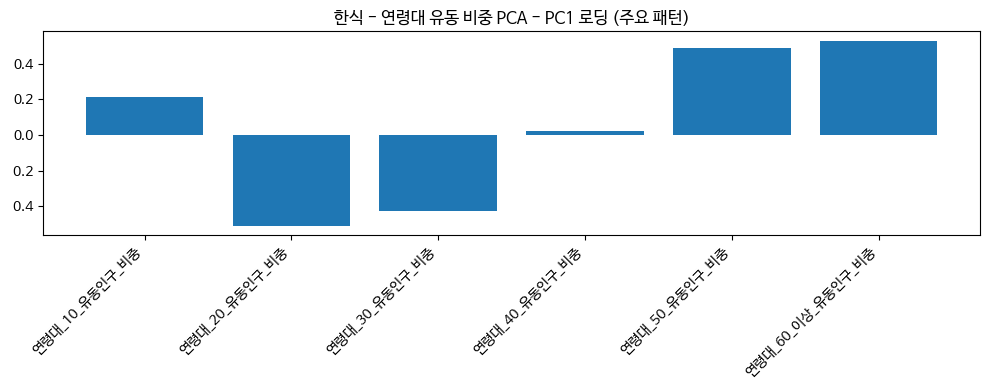

/tmp/ipython-input-2437703162.py:56: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()


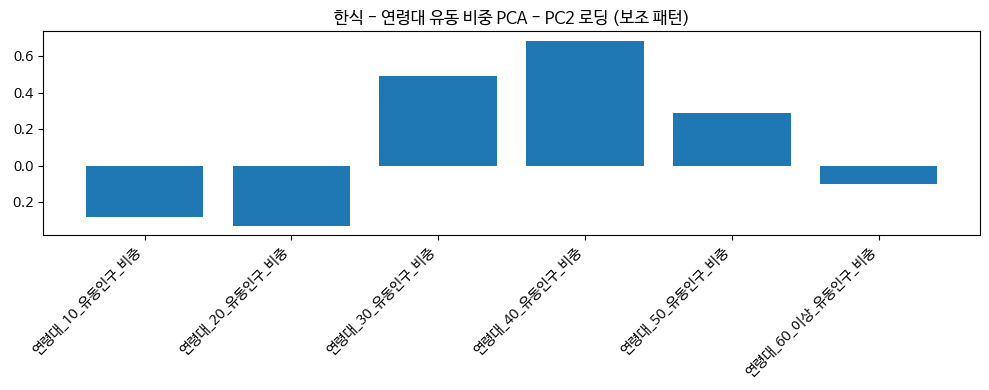

In [ ]:
age_ratio_cols = [
    c for c in df_korean_ratio.columns
    if c.startswith("연령대_") and "유동인구_비중" in c
]

pca_age, loadings_age = run_and_show_pca(
    df_korean_ratio,
    age_ratio_cols,
    n_components=2,
    title_prefix="한식 - 연령대 유동 비중 PCA"
)


===== 한식 - 시간대 유동 비중 PCA 설명분산비율 =====
PC1: 0.6846 (누적 0.6846)
PC2: 0.2708 (누적 0.9554)

===== 한식 - 시간대 유동 비중 PCA 변수별 로딩(기여도) =====


,PC1,PC2
시간대_14_17_유동인구_비중,0.490447,0.010586
시간대_11_14_유동인구_비중,0.474081,0.180154
시간대_17_21_유동인구_비중,0.343392,-0.520490
시간대_06_11_유동인구_비중,-0.038746,0.748345
시간대_21_24_유동인구_비중,-0.424203,-0.361788
시간대_00_06_유동인구_비중,-0.485120,0.074916


/tmp/ipython-input-2437703162.py:47: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


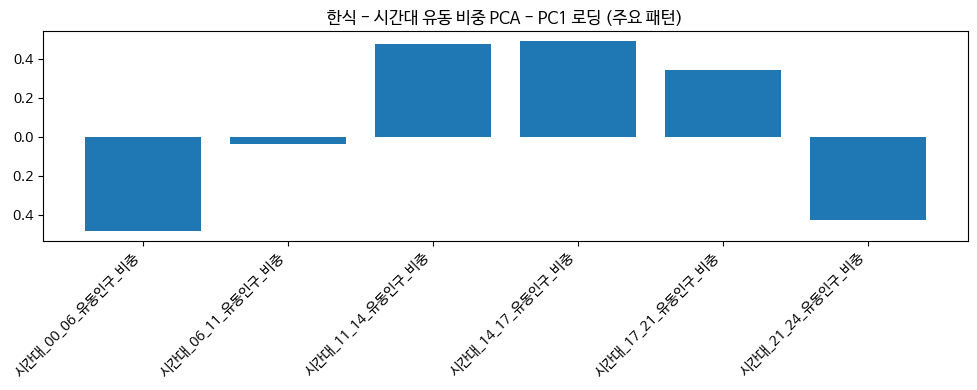

/tmp/ipython-input-2437703162.py:56: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()


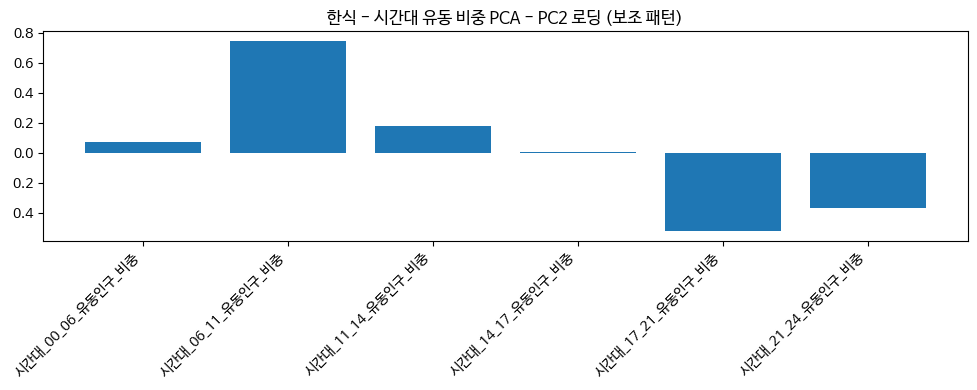

In [ ]:
time_ratio_cols = [
    c for c in df_korean_ratio.columns
    if c.startswith("시간대_") and "유동인구_비중" in c
]

pca_time, loadings_time = run_and_show_pca(
    df_korean_ratio,
    time_ratio_cols,
    n_components=2,
    title_prefix="한식 - 시간대 유동 비중 PCA"
)


===== 한식 - 요일별 유동 비중 PCA 설명분산비율 =====
PC1: 0.9274 (누적 0.9274)

===== 한식 - 요일별 유동 비중 PCA 변수별 로딩(기여도) =====


,PC1
목요일_유동인구_비중,0.388240
화요일_유동인구_비중,0.386650
수요일_유동인구_비중,0.378886
월요일_유동인구_비중,0.376220
금요일_유동인구_비중,0.356572
토요일_유동인구_비중,-0.376036
일요일_유동인구_비중,-0.382268


/tmp/ipython-input-2437703162.py:47: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


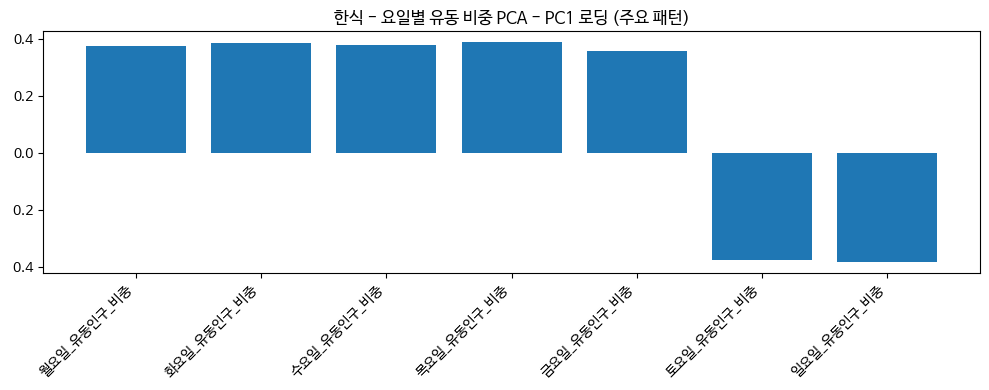

In [ ]:
weekday_names = ["월요일", "화요일", "수요일", "목요일", "금요일", "토요일", "일요일"]
weekday_ratio_cols = [
    c for c in df_korean_ratio.columns
    if any(c.startswith(d) for d in weekday_names) and "유동인구_비중" in c
]

pca_week, loadings_week = run_and_show_pca(
    df_korean_ratio,
    weekday_ratio_cols,
    n_components=1,  # 평일 vs 주말 축 하나만 보면 충분
    title_prefix="한식 - 요일별 유동 비중 PCA")

여기까지 한식한 거고, 이렇게 업종별로 하나하나 돌리기 너무 귀찮아서 전체 코드 만듦.

In [ ]:
industry_list_except_korean = [
    "양식", "일식", "중식", "분식", "치킨",
    "커피", "제과점", "패스트푸드", "호프-간이주점"
]
def build_ratio_pca_for_all(df, industry_list):
    """
    업종별로 df_ratio, df_pca 를 자동 생성하여 딕셔너리로 반환.
    """
    results = {}

    for industry in industry_list:
        print(f"\n==============================")
        print(f"▶ 업종: {industry} — 데이터 생성 시작")
        print("==============================")

        # 1) 업종별 필터링
        df_sub = filter_by_industry(df, industry)

        # 2) 비중화
        df_ratio = add_ratio_features(df_sub)

        # 3) PCA
        df_pca = add_pca_features(df_ratio)

        # 저장
        results[industry] = {
            "ratio": df_ratio,
            "pca": df_pca
        }

        print(f"▶ 업종 '{industry}' 생성 완료 (행 수: {len(df_pca)})")

    return results

In [ ]:
results_all = build_ratio_pca_for_all(df, industry_list_except_korean)


▶ 업종: 양식 — 데이터 생성 시작
[양식] 사용 클러스터: [1, 2, 5, 6, 7, 8] / 선택된 상권 수: 199
✅ 연령대 비중 컬럼 생성: 6개 사용
✅ 시간대 비중 컬럼 생성: 6개 사용
✅ 요일 비중 컬럼 생성: 7개 사용
✅ 직장/상주/유동 비중 + 상주_유동_비율 생성 완료
✅ 연령PCA: PCA 수행 (사용 컬럼 6개 → PC 2개 생성)
✅ 시간PCA: PCA 수행 (사용 컬럼 6개 → PC 2개 생성)
✅ 요일PCA: PCA 수행 (사용 컬럼 7개 → PC 1개 생성)
▶ 업종 '양식' 생성 완료 (행 수: 199)

▶ 업종: 일식 — 데이터 생성 시작
[일식] 사용 클러스터: [1, 2, 4, 6, 7, 9] / 선택된 상권 수: 277
✅ 연령대 비중 컬럼 생성: 6개 사용
✅ 시간대 비중 컬럼 생성: 6개 사용
✅ 요일 비중 컬럼 생성: 7개 사용
✅ 직장/상주/유동 비중 + 상주_유동_비율 생성 완료
✅ 연령PCA: PCA 수행 (사용 컬럼 6개 → PC 2개 생성)
✅ 시간PCA: PCA 수행 (사용 컬럼 6개 → PC 2개 생성)
✅ 요일PCA: PCA 수행 (사용 컬럼 7개 → PC 1개 생성)
▶ 업종 '일식' 생성 완료 (행 수: 277)

▶ 업종: 중식 — 데이터 생성 시작
[중식] 사용 클러스터: [1, 2, 4, 6, 7] / 선택된 상권 수: 270
✅ 연령대 비중 컬럼 생성: 6개 사용
✅ 시간대 비중 컬럼 생성: 6개 사용
✅ 요일 비중 컬럼 생성: 7개 사용
✅ 직장/상주/유동 비중 + 상주_유동_비율 생성 완료
✅ 연령PCA: PCA 수행 (사용 컬럼 6개 → PC 2개 생성)
✅ 시간PCA: PCA 수행 (사용 컬럼 6개 → PC 2개 생성)
✅ 요일PCA: PCA 수행 (사용 컬럼 7개 → PC 1개 생성)
▶ 업종 '중식' 생성 완료 (행 수: 270)

▶ 업종: 분식 — 데이터 생성 시작
[분식] 사용 클러스터: [0, 4, 9] / 선택된 상권 수: 825
✅ 연령대 비중 컬럼 생성: 6

업종별로 다 확인하긴 힘드니까, 양식만 한번 확인  

이후에, 다른 업종도 확인하고 싶으면 양식자리에다가 해당 업종명 치고 확인하면 됨.


===== 양식 - 연령대 PCA 설명분산비율 =====
PC1: 0.4619 (누적 0.4619)
PC2: 0.3492 (누적 0.8110)

===== 양식 - 연령대 PCA 변수별 로딩(기여도) =====


,PC1,PC2
연령대_20_유동인구_비중,0.568517,0.125759
연령대_10_유동인구_비중,-0.006772,-0.558733
연령대_30_유동인구_비중,-0.175222,0.636552
연령대_60_이상_유동인구_비중,-0.336374,-0.402683
연령대_40_유동인구_비중,-0.479402,0.310631
연령대_50_유동인구_비중,-0.550514,-0.090322


/tmp/ipython-input-2437703162.py:47: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


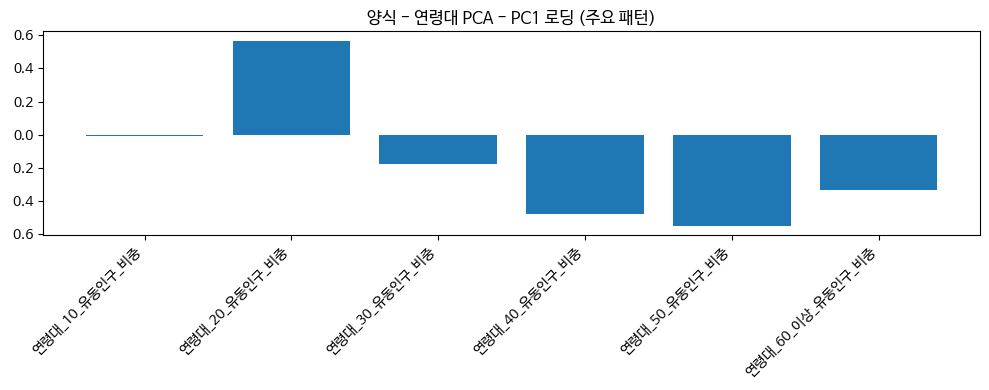

/tmp/ipython-input-2437703162.py:56: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()


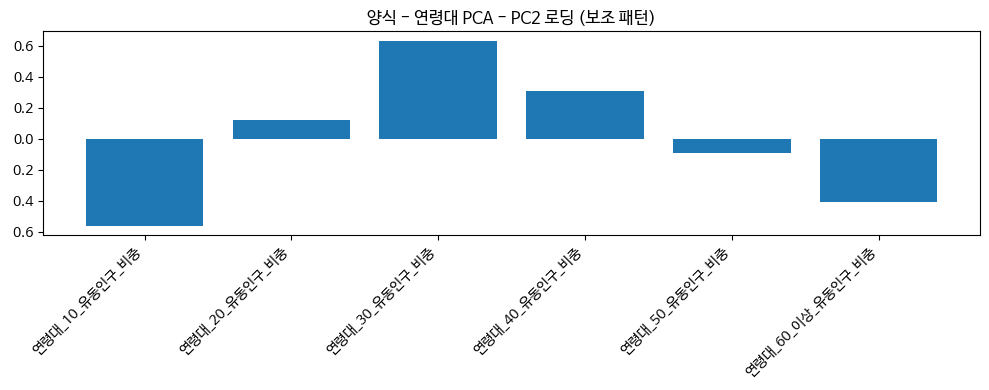

(PCA(n_components=2, random_state=42),
                         PC1       PC2
 연령대_10_유동인구_비중    -0.006772 -0.558733
 연령대_20_유동인구_비중     0.568517  0.125759
 연령대_30_유동인구_비중    -0.175222  0.636552
 연령대_40_유동인구_비중    -0.479402  0.310631
 연령대_50_유동인구_비중    -0.550514 -0.090322
 연령대_60_이상_유동인구_비중 -0.336374 -0.402683)

In [ ]:
df_western_ratio = results_all["양식"]["ratio"]

age_cols = [c for c in df_western_ratio.columns
            if c.startswith("연령대_") and "유동인구_비중" in c]

run_and_show_pca(
    df_western_ratio,
    age_cols,
    n_components=2,
    title_prefix="양식 - 연령대 PCA"
)


===== 양식 - 시간대 PCA 설명분산비율 =====
PC1: 0.6488 (누적 0.6488)
PC2: 0.3187 (누적 0.9676)

===== 양식 - 시간대 PCA 변수별 로딩(기여도) =====


,PC1,PC2
시간대_14_17_유동인구_비중,0.502132,-0.055295
시간대_11_14_유동인구_비중,0.492625,0.140474
시간대_17_21_유동인구_비중,0.206703,-0.640578
시간대_06_11_유동인구_비중,0.035556,0.696392
시간대_21_24_유동인구_비중,-0.464958,-0.262873
시간대_00_06_유동인구_비중,-0.494982,0.113160


/tmp/ipython-input-2437703162.py:47: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


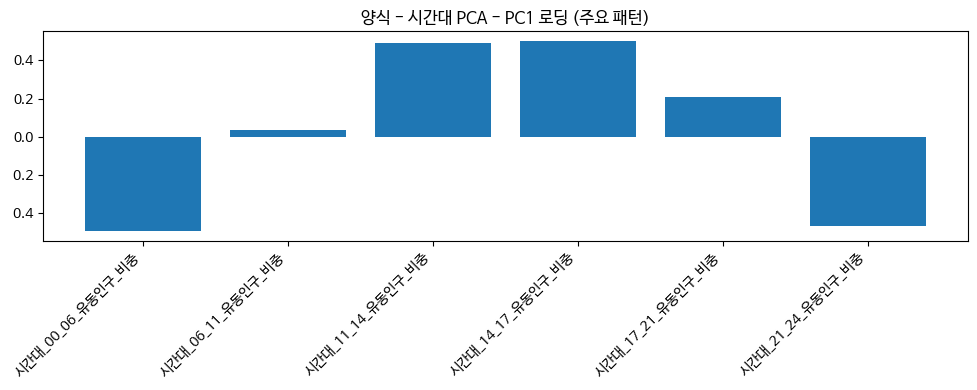

/tmp/ipython-input-2437703162.py:56: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()


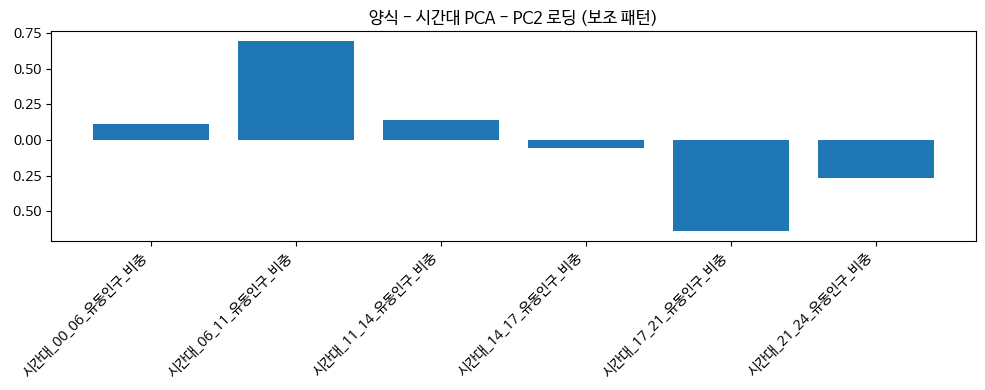


===== 양식 - 요일 PCA 설명분산비율 =====
PC1: 0.9041 (누적 0.9041)

===== 양식 - 요일 PCA 변수별 로딩(기여도) =====


,PC1
목요일_유동인구_비중,0.393422
화요일_유동인구_비중,0.388152
수요일_유동인구_비중,0.382639
월요일_유동인구_비중,0.377326
금요일_유동인구_비중,0.325255
토요일_유동인구_비중,-0.385731
일요일_유동인구_비중,-0.388833


/tmp/ipython-input-2437703162.py:47: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


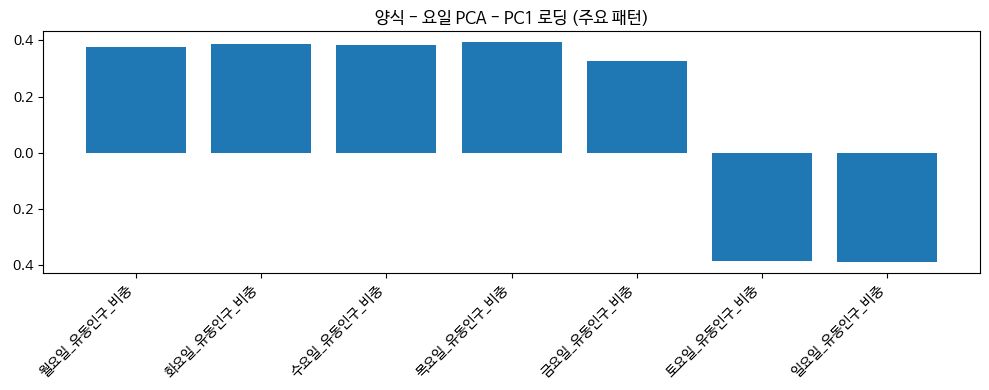

(PCA(n_components=1, random_state=42),
                   PC1
 월요일_유동인구_비중  0.377326
 화요일_유동인구_비중  0.388152
 수요일_유동인구_비중  0.382639
 목요일_유동인구_비중  0.393422
 금요일_유동인구_비중  0.325255
 토요일_유동인구_비중 -0.385731
 일요일_유동인구_비중 -0.388833)

In [ ]:
# 시간대 PCA
time_cols = [c for c in df_western_ratio.columns
             if c.startswith("시간대_") and "유동인구_비중" in c]

run_and_show_pca(
    df_western_ratio,
    time_cols,
    n_components=2,
    title_prefix="양식 - 시간대 PCA"
)

# 요일 PCA
weekday_names = ["월요일", "화요일", "수요일", "목요일", "금요일", "토요일", "일요일"]
weekday_cols = [
    c for c in df_western_ratio.columns
    if any(c.startswith(d) for d in weekday_names) and "유동인구_비중" in c
]

run_and_show_pca(
    df_western_ratio,
    weekday_cols,
    n_components=1,
    title_prefix="양식 - 요일 PCA"
)

다 잘 되어있는 거 확인 완!

# 2단계: RandomForest / XGBoost + SHAP

In [ ]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
import shap

def run_rf_shap_for_df(
    df,
    target_col="평균_점포당_조정_매출",
    industry_name="(전체)",
    random_state=42
):
    """
    하나의 업종(df)에 대해:
    1) 모델용 피처 선택
    2) RandomForest 학습
    3) SHAP 값 계산
    4) 변수 중요도(mean |SHAP|) 테이블 반환
    """
    df = df.copy()

    # 1) 타깃 결측 제거
    df_model = df[df[target_col].notna()].copy()
    print(f"\n▶ 업종: {industry_name}")
    print(f" - 전체 행 수: {len(df)} / 타깃 유효 행 수: {len(df_model)}")
    if len(df_model) < 50:
        print(" ⚠ 샘플이 50개 미만이라 결과 해석 시 주의가 필요합니다.")

    # 2) 사용할 후보 피처 정의
    candidate_features = [
        # PCA 요약 변수
        "연령PCA_PC1", "연령PCA_PC2",
        "시간PCA_PC1", "시간PCA_PC2",
        "요일PCA_PC1",

        # 절대 규모
        "총_유동인구_수", "총_직장_인구_수", "총_상주인구_수",

        # 구조(비중/비율)
        "직장인_비중(전체인구)", "상주인_비중(전체인구)", "유동인구_비중(전체인구)",
        "상주_유동_비율",

        # 소득/지출
        "월_평균_소득_금액", "지출_총금액",
        "식료품_지출_총금액", "의류_신발_지출_총금액",
        "생활용품_지출_총금액", "의료비_지출_총금액",
        "교통_지출_총금액", "여가_지출_총금액",
        "문화_지출_총금액", "교육_지출_총금액", "유흥_지출_총금액",

        # 기타
        "집객시설_수"
    ]

    # 실제 df에 존재하는 컬럼만 사용
    feature_cols = [c for c in candidate_features if c in df_model.columns]
    print(f" - 사용 피처 수: {len(feature_cols)}개")
    if len(feature_cols) == 0:
        raise ValueError("사용 가능한 피처가 없습니다. candidate_features를 확인하세요.")

    X = df_model[feature_cols].fillna(0)
    y = df_model[target_col]

    # 3) RandomForest 모델 학습
    rf = RandomForestRegressor(
        n_estimators=500,
        max_depth=None,
        min_samples_split=5,
        min_samples_leaf=3,
        random_state=random_state,
        n_jobs=-1
    )
    rf.fit(X, y)

    # 4) SHAP 값 계산
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(X)

    # 5) 변수 중요도: 평균 |SHAP|로 랭킹
    shap_abs_mean = np.abs(shap_values).mean(axis=0)
    importance_df = pd.DataFrame({
        "feature": feature_cols,
        "mean_abs_shap": shap_abs_mean
    }).sort_values("mean_abs_shap", ascending=False).reset_index(drop=True)

    print("\n[RF + SHAP 기준 중요 변수 TOP 10]")
    display(importance_df.head(10))

    # 6) 결과 묶어서 반환
    result = {
        "df_model": df_model,
        "X": X,
        "y": y,
        "rf": rf,
        "explainer": explainer,
        "shap_values": shap_values,
        "importance_df": importance_df,
        "feature_cols": feature_cols,
    }
    return result

각 업종별로 해당 모델이 타당성이 있는지 확인


▶ 업종: 한식
 - 유효 샘플 수: 733
 - 사용 피처 수: 24개
 - R² (train): 0.516
 - OOB Score : 0.019


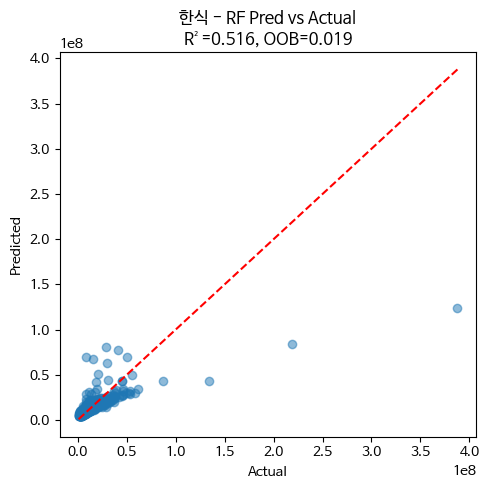


▶ 업종: 양식
 - 유효 샘플 수: 199
 - 사용 피처 수: 24개
 - R² (train): 0.605
 - OOB Score : 0.122


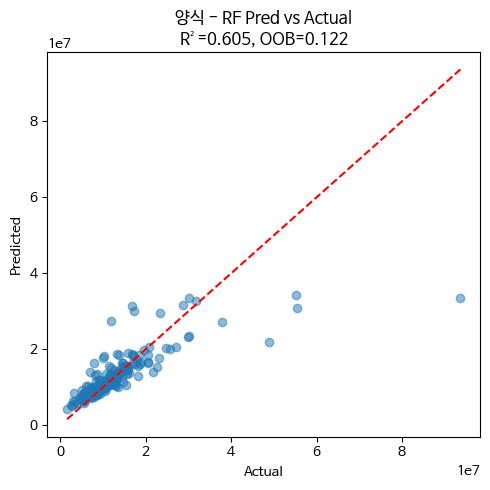


▶ 업종: 일식
 - 유효 샘플 수: 277
 - 사용 피처 수: 24개
 - R² (train): 0.650
 - OOB Score : 0.106


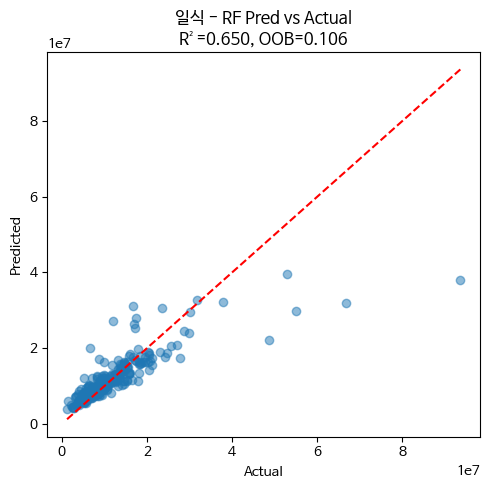


▶ 업종: 중식
 - 유효 샘플 수: 270
 - 사용 피처 수: 24개
 - R² (train): 0.638
 - OOB Score : 0.112


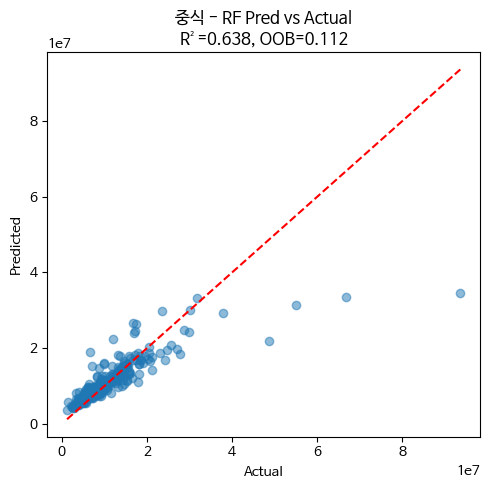


▶ 업종: 분식
 - 유효 샘플 수: 825
 - 사용 피처 수: 24개
 - R² (train): 0.536
 - OOB Score : 0.071


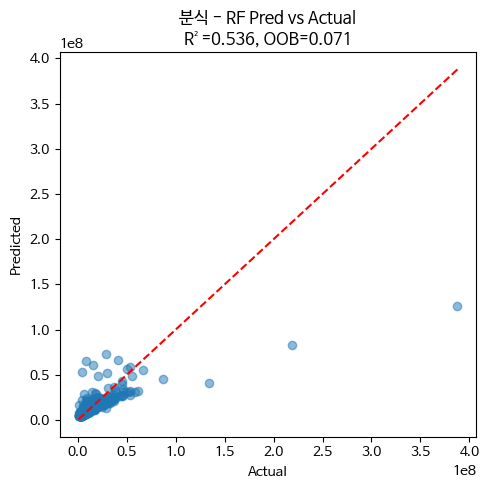


▶ 업종: 치킨
 - 유효 샘플 수: 818
 - 사용 피처 수: 24개
 - R² (train): 0.537
 - OOB Score : 0.040


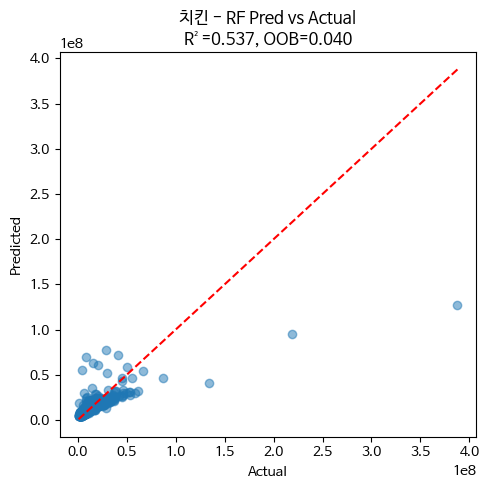


▶ 업종: 커피
 - 유효 샘플 수: 266
 - 사용 피처 수: 24개
 - R² (train): 0.709
 - OOB Score : 0.155


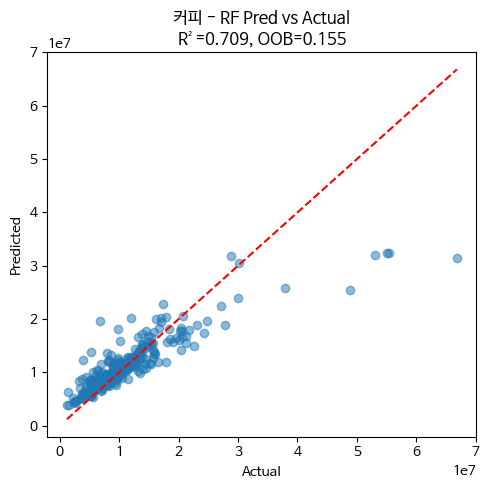


▶ 업종: 제과점
 - 유효 샘플 수: 839
 - 사용 피처 수: 24개
 - R² (train): 0.508
 - OOB Score : 0.014


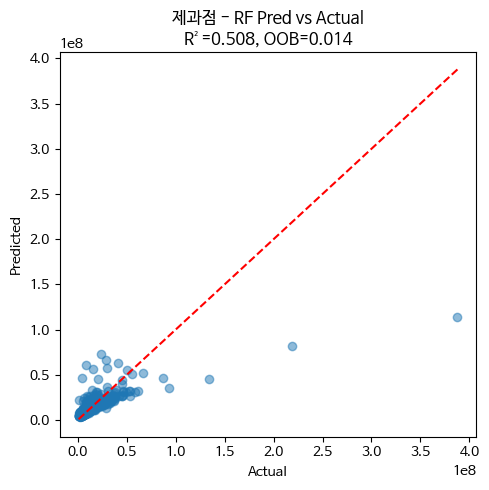


▶ 업종: 패스트푸드
 - 유효 샘플 수: 167
 - 사용 피처 수: 24개
 - R² (train): 0.366
 - OOB Score : -0.200


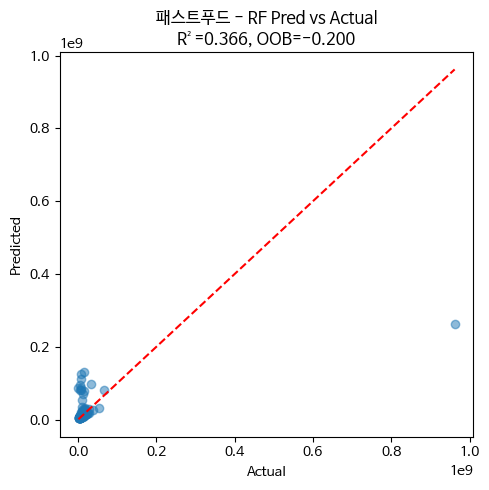


▶ 업종: 호프-간이주점
 - 유효 샘플 수: 838
 - 사용 피처 수: 24개
 - R² (train): 0.485
 - OOB Score : 0.017


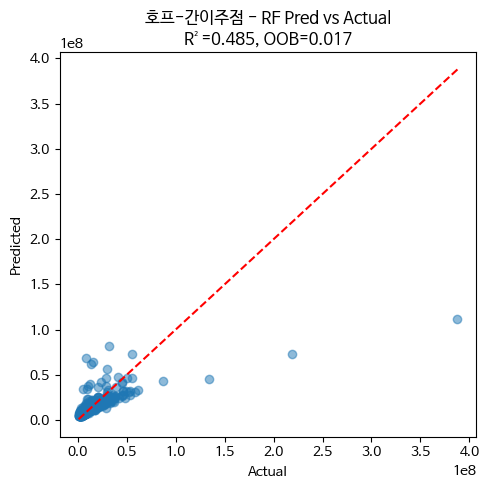

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# 1) 업종별 df_pca를 묶어서 dict로 준비 (한식 + 나머지)
industry_df_map = {
    "한식": df_korean_pca
}
for ind in ["양식", "일식", "중식", "분식", "치킨",
            "커피", "제과점", "패스트푸드", "호프-간이주점"]:
    industry_df_map[ind] = results_all[ind]["pca"]   # 앞에서 만든 results_all 사용


# 2) 피처 후보 (실제 존재하는 것만 골라서 사용됨)
candidate_features = [
    # PCA 요약 변수
    "연령PCA_PC1", "연령PCA_PC2",
    "시간PCA_PC1", "시간PCA_PC2",
    "요일PCA_PC1",

    # 절대 규모
    "총_유동인구_수", "총_직장_인구_수", "총_상주인구_수",

    # 구조(비중/비율)
    "직장인_비중(전체인구)", "상주인_비중(전체인구)", "유동인구_비중(전체인구)",
    "상주_유동_비율",

    # 소득/지출
    "월_평균_소득_금액", "지출_총금액",
    "식료품_지출_총금액", "의류_신발_지출_총금액",
    "생활용품_지출_총금액", "의료비_지출_총금액",
    "교통_지출_총금액", "여가_지출_총금액",
    "문화_지출_총금액", "교육_지출_총금액", "유흥_지출_총금액",

    # 기타
    "집객시설_수"
]


def evaluate_rf_for_industry(df_pca, industry_name, target_col="평균_점포당_조정_매출", random_state=42):
    """
    1) 타깃 결측 제거
    2) RF(oob_score=True) 학습
    3) R², OOB Score 계산
    4) Actual vs Predicted scatter plot
    """
    df_model = df_pca[df_pca[target_col].notna()].copy()
    n_samples = len(df_model)
    print(f"\n==============================")
    print(f"▶ 업종: {industry_name}")
    print(f" - 유효 샘플 수: {n_samples}")

    if n_samples < 50:
        print(" ⚠ 샘플이 50개 미만이라 평가 안정성이 떨어질 수 있습니다.")

    # 실제 존재하는 피처만 사용
    feature_cols = [c for c in candidate_features if c in df_model.columns]
    print(f" - 사용 피처 수: {len(feature_cols)}개")

    if len(feature_cols) == 0:
        print(" ❌ 사용 가능한 피처가 없습니다. candidate_features를 확인하세요.")
        return None

    X = df_model[feature_cols].fillna(0)
    y = df_model[target_col]

    # RF 모델 (OOB 포함)
    rf = RandomForestRegressor(
        n_estimators=500,
        max_depth=None,
        min_samples_split=5,
        min_samples_leaf=3,
        oob_score=True,
        random_state=random_state,
        n_jobs=-1
    )
    rf.fit(X, y)

    # R² (train 기준)
    preds = rf.predict(X)
    r2 = r2_score(y, preds)

    # OOB Score
    oob = rf.oob_score_

    print(f" - R² (train): {r2:.3f}")
    print(f" - OOB Score : {oob:.3f}")

    # Scatter plot: Actual vs Predicted
    plt.figure(figsize=(5, 5))
    plt.scatter(y, preds, alpha=0.5)
    max_val = max(y.max(), preds.max())
    min_val = min(y.min(), preds.min())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')  # 대각선(완벽예측 기준선)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{industry_name} - RF Pred vs Actual\nR²={r2:.3f}, OOB={oob:.3f}")
    plt.tight_layout()
    plt.show()

    return {
        "industry": industry_name,
        "model": rf,
        "feature_cols": feature_cols,
        "X": X,
        "y": y,
        "r2": r2,
        "oob": oob
    }


# 3) 전체 업종에 대해 한 방에 평가
rf_eval_results = {}

for industry_name, df_pca in industry_df_map.items():
    res = evaluate_rf_for_industry(df_pca, industry_name)
    rf_eval_results[industry_name] = res

1) (최우선) R² 점수 확인
✔ 해석:
0.5~0.7 이상이면 업종 매출 모델로 훌륭함
0, 음수 → 모델 무의미 (= 그냥 평균보다 못함)

2) Out-of-Bag (OOB) Score 활용 (더 정확한 검증)
✔ 해석: 0.4~0.6 이상이면 매우 잘 학습한 편

3) 예측값 vs 실제값 scatter plot (시각적 진단)
✔ 해석: 대각선 근처면 → 모델이 꽤 잘 맞추는 것, 뭉개져 있으면 → 업종의 variance가 크거나 noise 많음, 한쪽으로 치우치면 → 편향 존재

유용한 변수를 mean_abs_shap를 활용해서 확인하고자 함.

SHAP 값은 **“각 피처가 예측값을 얼마나 변화시켰는지”**를 의미하는데,

mean_abs_shap는 그 중에서도:각 변수의 SHAP 절댓값을 전체 데이터에 대해 평균낸 값이기에 타당하다고 판단

mean_abs_shap

* 공선성에 강하고

* 변수 간 상호작용 반영

* positive/negative 구분 없이 “강한 영향력”만 측정

해당 이유 때문에 판단 지표로서 활용함.

In [ ]:
# 한식 랜포 결과

result_korean_rf = run_rf_shap_for_df(
    df_korean_pca,
    target_col="평균_점포당_조정_매출",
    industry_name="한식"
)


▶ 업종: 한식
 - 전체 행 수: 733 / 타깃 유효 행 수: 733
 - 사용 피처 수: 24개

[RF + SHAP 기준 중요 변수 TOP 10]


,feature,mean_abs_shap
0,월_평균_소득_금액,2.415529e+06
1,총_상주인구_수,1.332351e+06
2,식료품_지출_총금액,1.128212e+06
3,의료비_지출_총금액,5.685973e+05
4,유동인구_비중(전체인구),4.414626e+05
5,생활용품_지출_총금액,3.997636e+05
6,총_유동인구_수,3.953415e+05
7,연령PCA_PC2,3.657180e+05
8,집객시설_수,3.369678e+05
9,연령PCA_PC1,3.219368e+05


한식 제외 나머지 업종 RF결과

In [ ]:
rf_results_all = {}

for industry in ["양식", "일식", "중식", "분식", "치킨",
                 "커피", "제과점", "패스트푸드", "호프-간이주점"]:
    df_pca = results_all[industry]["pca"]
    rf_results_all[industry] = run_rf_shap_for_df(
        df_pca,
        target_col="평균_점포당_조정_매출",
        industry_name=industry
    )


▶ 업종: 양식
 - 전체 행 수: 199 / 타깃 유효 행 수: 199
 - 사용 피처 수: 24개

[RF + SHAP 기준 중요 변수 TOP 10]


,feature,mean_abs_shap
0,총_유동인구_수,1.027218e+06
1,월_평균_소득_금액,9.826625e+05
2,총_상주인구_수,9.641938e+05
3,시간PCA_PC2,9.295892e+05
4,연령PCA_PC1,6.298135e+05
5,시간PCA_PC1,4.372613e+05
6,직장인_비중(전체인구),2.801658e+05
7,유동인구_비중(전체인구),2.027655e+05
8,문화_지출_총금액,1.978112e+05
9,총_직장_인구_수,1.764226e+05



▶ 업종: 일식
 - 전체 행 수: 277 / 타깃 유효 행 수: 277
 - 사용 피처 수: 24개

[RF + SHAP 기준 중요 변수 TOP 10]


,feature,mean_abs_shap
0,직장인_비중(전체인구),1.333579e+06
1,시간PCA_PC2,1.075419e+06
2,총_상주인구_수,6.892189e+05
3,시간PCA_PC1,5.885604e+05
4,총_유동인구_수,5.601387e+05
5,월_평균_소득_금액,4.403418e+05
6,연령PCA_PC1,4.327613e+05
7,유동인구_비중(전체인구),2.460738e+05
8,집객시설_수,2.330172e+05
9,총_직장_인구_수,2.210744e+05



▶ 업종: 중식
 - 전체 행 수: 270 / 타깃 유효 행 수: 270
 - 사용 피처 수: 24개

[RF + SHAP 기준 중요 변수 TOP 10]


,feature,mean_abs_shap
0,직장인_비중(전체인구),1.085142e+06
1,총_유동인구_수,9.377806e+05
2,총_상주인구_수,8.249599e+05
3,시간PCA_PC2,6.662057e+05
4,월_평균_소득_금액,4.660925e+05
5,시간PCA_PC1,4.298220e+05
6,연령PCA_PC1,3.290449e+05
7,총_직장_인구_수,2.865526e+05
8,유동인구_비중(전체인구),2.580764e+05
9,요일PCA_PC1,1.618638e+05



▶ 업종: 분식
 - 전체 행 수: 825 / 타깃 유효 행 수: 825
 - 사용 피처 수: 24개

[RF + SHAP 기준 중요 변수 TOP 10]


,feature,mean_abs_shap
0,월_평균_소득_금액,2.218376e+06
1,총_상주인구_수,1.428231e+06
2,식료품_지출_총금액,5.295565e+05
3,직장인_비중(전체인구),5.265360e+05
4,문화_지출_총금액,4.995321e+05
5,의료비_지출_총금액,4.680944e+05
6,총_유동인구_수,4.208800e+05
7,집객시설_수,4.160486e+05
8,생활용품_지출_총금액,4.144280e+05
9,유동인구_비중(전체인구),3.484938e+05



▶ 업종: 치킨
 - 전체 행 수: 818 / 타깃 유효 행 수: 818
 - 사용 피처 수: 24개

[RF + SHAP 기준 중요 변수 TOP 10]


,feature,mean_abs_shap
0,월_평균_소득_금액,2.250475e+06
1,총_상주인구_수,1.368567e+06
2,식료품_지출_총금액,6.503961e+05
3,의료비_지출_총금액,5.529199e+05
4,문화_지출_총금액,4.863054e+05
5,총_유동인구_수,4.750083e+05
6,생활용품_지출_총금액,4.626729e+05
7,직장인_비중(전체인구),4.259051e+05
8,집객시설_수,3.780479e+05
9,유동인구_비중(전체인구),3.376680e+05



▶ 업종: 커피
 - 전체 행 수: 266 / 타깃 유효 행 수: 266
 - 사용 피처 수: 24개

[RF + SHAP 기준 중요 변수 TOP 10]


,feature,mean_abs_shap
0,직장인_비중(전체인구),1.471370e+06
1,시간PCA_PC1,6.353517e+05
2,월_평균_소득_금액,6.159606e+05
3,연령PCA_PC1,5.944753e+05
4,총_상주인구_수,4.680730e+05
5,총_유동인구_수,4.583921e+05
6,시간PCA_PC2,3.675381e+05
7,집객시설_수,2.938171e+05
8,총_직장_인구_수,2.727631e+05
9,요일PCA_PC1,1.873266e+05



▶ 업종: 제과점
 - 전체 행 수: 839 / 타깃 유효 행 수: 839
 - 사용 피처 수: 24개

[RF + SHAP 기준 중요 변수 TOP 10]


,feature,mean_abs_shap
0,월_평균_소득_금액,2.101480e+06
1,총_상주인구_수,1.435164e+06
2,의료비_지출_총금액,8.106751e+05
3,식료품_지출_총금액,7.921475e+05
4,생활용품_지출_총금액,5.311838e+05
5,총_유동인구_수,4.914672e+05
6,문화_지출_총금액,4.145401e+05
7,집객시설_수,4.038391e+05
8,직장인_비중(전체인구),4.017807e+05
9,시간PCA_PC2,3.264337e+05



▶ 업종: 패스트푸드
 - 전체 행 수: 167 / 타깃 유효 행 수: 167
 - 사용 피처 수: 24개

[RF + SHAP 기준 중요 변수 TOP 10]


,feature,mean_abs_shap
0,총_유동인구_수,1.223209e+07
1,직장인_비중(전체인구),1.429998e+06
2,총_직장_인구_수,1.339352e+06
3,여가_지출_총금액,1.287136e+06
4,시간PCA_PC2,1.205751e+06
5,총_상주인구_수,8.486089e+05
6,연령PCA_PC1,8.373324e+05
7,시간PCA_PC1,7.975812e+05
8,요일PCA_PC1,7.790399e+05
9,월_평균_소득_금액,6.515263e+05



▶ 업종: 호프-간이주점
 - 전체 행 수: 838 / 타깃 유효 행 수: 838
 - 사용 피처 수: 24개

[RF + SHAP 기준 중요 변수 TOP 10]


,feature,mean_abs_shap
0,월_평균_소득_금액,2.126505e+06
1,총_상주인구_수,1.430014e+06
2,식료품_지출_총금액,8.573878e+05
3,의료비_지출_총금액,7.258538e+05
4,문화_지출_총금액,7.033707e+05
5,집객시설_수,6.127126e+05
6,총_유동인구_수,5.879692e+05
7,생활용품_지출_총금액,5.747800e+05
8,여가_지출_총금액,3.418522e+05
9,직장인_비중(전체인구),2.874014e+05


SHAP summary plot이나 Dependence plot은 피쳐의 영향 방향이나 특정 피쳐의 영향정도를 나타내는 값이라 굳이 필요 없다고 판단. 우선 SHAP 평균값으로만 피쳐 선정 완

mean SHAP의 임계값 (해당 값이 넘으면 유의미한 피쳐라 판단)을 뭐라고 할지에 대한 고민 필요

# 3단계: 회귀분석 진행
> 유의미한 변수를 찾기보다는, 변수별 방향성 위주 확인  
> RF모델이 좋지 않았던 패스트푸드, 간이주점은 p-value값 등 추가적 수치확인을 통해 유의미한 변수도 더블췍


▶ 업종: 한식 — RF + SHAP + OLS 시작

 - 유효 샘플 수: 733
 - 사용 피처 수: 24개
 - R² (train): 0.516
 - OOB Score : 0.019


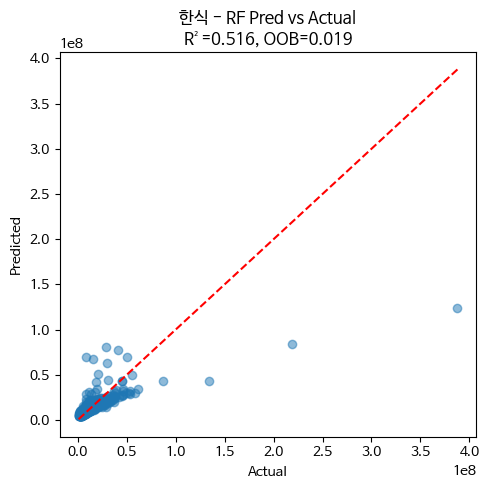


[RF + SHAP 기준 중요 변수 TOP 15]


,feature,mean_abs_shap
0,월_평균_소득_금액,2.415529e+06
1,총_상주인구_수,1.332351e+06
2,식료품_지출_총금액,1.128212e+06
3,의료비_지출_총금액,5.685973e+05
4,유동인구_비중(전체인구),4.414626e+05
5,생활용품_지출_총금액,3.997636e+05
6,총_유동인구_수,3.953415e+05
7,연령PCA_PC2,3.657180e+05
8,집객시설_수,3.369678e+05
9,연령PCA_PC1,3.219368e+05



--- OLS 회귀분석 (방향성 해석) ---
 - 중요 변수 Top 10: ['월_평균_소득_금액', '총_상주인구_수', '식료품_지출_총금액', '의료비_지출_총금액', '유동인구_비중(전체인구)', '생활용품_지출_총금액', '총_유동인구_수', '연령PCA_PC2', '집객시설_수', '연령PCA_PC1']

 ⚠ 공선성 높아 제거됨 → 식료품_지출_총금액 (VIF=1338.56)
 ⚠ 공선성 높아 제거됨 → 의료비_지출_총금액 (VIF=126.81)
 ⚠ 공선성 높아 제거됨 → 유동인구_비중(전체인구) (VIF=29.15)
 ⚠ 공선성 높아 제거됨 → 총_상주인구_수 (VIF=22.29)
 ✔ 최종 사용 변수 (6개): ['월_평균_소득_금액', '생활용품_지출_총금액', '총_유동인구_수', '연령PCA_PC2', '집객시설_수', '연령PCA_PC1']
                            OLS Regression Results                            
Dep. Variable:           평균_점포당_조정_매출   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     19.53
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           3.41e-21
Time:                        04:46:55   Log-Likelihood:                -13271.
No. Observations:                 733   AIC:                         2.656e+04
Df Residual

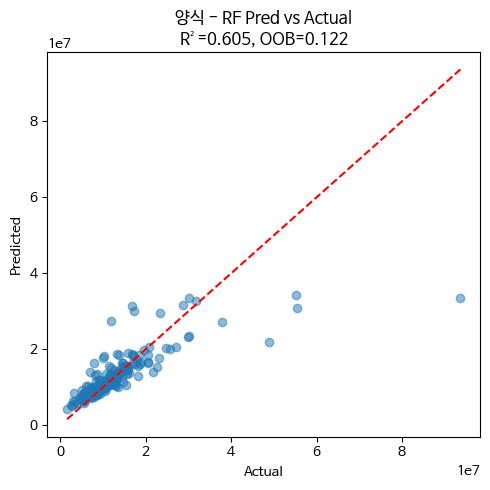


[RF + SHAP 기준 중요 변수 TOP 15]


,feature,mean_abs_shap
0,총_유동인구_수,1.027218e+06
1,월_평균_소득_금액,9.826625e+05
2,총_상주인구_수,9.641938e+05
3,시간PCA_PC2,9.295892e+05
4,연령PCA_PC1,6.298135e+05
5,시간PCA_PC1,4.372613e+05
6,직장인_비중(전체인구),2.801658e+05
7,유동인구_비중(전체인구),2.027655e+05
8,문화_지출_총금액,1.978112e+05
9,총_직장_인구_수,1.764226e+05



--- OLS 회귀분석 (방향성 해석) ---
 - 중요 변수 Top 10: ['총_유동인구_수', '월_평균_소득_금액', '총_상주인구_수', '시간PCA_PC2', '연령PCA_PC1', '시간PCA_PC1', '직장인_비중(전체인구)', '유동인구_비중(전체인구)', '문화_지출_총금액', '총_직장_인구_수']

 ⚠ 공선성 높아 제거됨 → 월_평균_소득_금액 (VIF=24.27)
 ⚠ 공선성 높아 제거됨 → 총_상주인구_수 (VIF=17.14)
 ✔ 최종 사용 변수 (8개): ['총_유동인구_수', '시간PCA_PC2', '연령PCA_PC1', '시간PCA_PC1', '직장인_비중(전체인구)', '유동인구_비중(전체인구)', '문화_지출_총금액', '총_직장_인구_수']
                            OLS Regression Results                            
Dep. Variable:           평균_점포당_조정_매출   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     5.126
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           8.52e-06
Time:                        04:47:00   Log-Likelihood:                -3464.4
No. Observations:                 199   AIC:                             6947.
Df Residuals:                     190   BIC:                

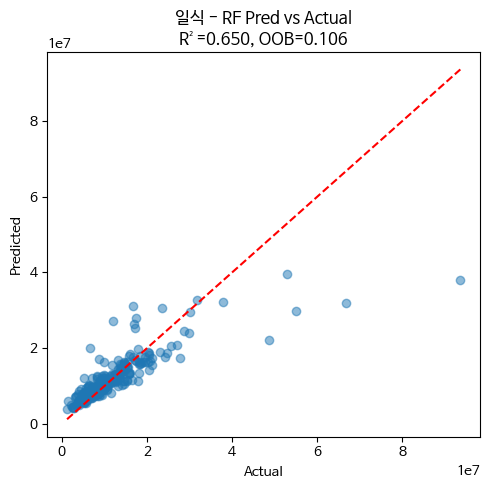


[RF + SHAP 기준 중요 변수 TOP 15]


,feature,mean_abs_shap
0,직장인_비중(전체인구),1.333579e+06
1,시간PCA_PC2,1.075419e+06
2,총_상주인구_수,6.892189e+05
3,시간PCA_PC1,5.885604e+05
4,총_유동인구_수,5.601387e+05
5,월_평균_소득_금액,4.403418e+05
6,연령PCA_PC1,4.327613e+05
7,유동인구_비중(전체인구),2.460738e+05
8,집객시설_수,2.330172e+05
9,총_직장_인구_수,2.210744e+05



--- OLS 회귀분석 (방향성 해석) ---
 - 중요 변수 Top 10: ['직장인_비중(전체인구)', '시간PCA_PC2', '총_상주인구_수', '시간PCA_PC1', '총_유동인구_수', '월_평균_소득_금액', '연령PCA_PC1', '유동인구_비중(전체인구)', '집객시설_수', '총_직장_인구_수']

 ⚠ 공선성 높아 제거됨 → 월_평균_소득_금액 (VIF=23.38)
 ✔ 최종 사용 변수 (9개): ['직장인_비중(전체인구)', '시간PCA_PC2', '총_상주인구_수', '시간PCA_PC1', '총_유동인구_수', '연령PCA_PC1', '유동인구_비중(전체인구)', '집객시설_수', '총_직장_인구_수']
                            OLS Regression Results                            
Dep. Variable:           평균_점포당_조정_매출   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     11.68
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           1.80e-15
Time:                        04:47:05   Log-Likelihood:                -4791.7
No. Observations:                 277   AIC:                             9603.
Df Residuals:                     267   BIC:                             9640.
Df Model:   

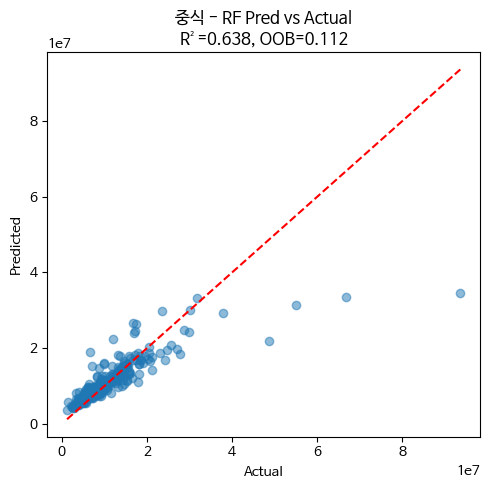


[RF + SHAP 기준 중요 변수 TOP 15]


,feature,mean_abs_shap
0,직장인_비중(전체인구),1.085142e+06
1,총_유동인구_수,9.377806e+05
2,총_상주인구_수,8.249599e+05
3,시간PCA_PC2,6.662057e+05
4,월_평균_소득_금액,4.660925e+05
5,시간PCA_PC1,4.298220e+05
6,연령PCA_PC1,3.290449e+05
7,총_직장_인구_수,2.865526e+05
8,유동인구_비중(전체인구),2.580764e+05
9,요일PCA_PC1,1.618638e+05



--- OLS 회귀분석 (방향성 해석) ---
 - 중요 변수 Top 10: ['직장인_비중(전체인구)', '총_유동인구_수', '총_상주인구_수', '시간PCA_PC2', '월_평균_소득_금액', '시간PCA_PC1', '연령PCA_PC1', '총_직장_인구_수', '유동인구_비중(전체인구)', '요일PCA_PC1']

 ⚠ 공선성 높아 제거됨 → 월_평균_소득_금액 (VIF=23.78)
 ✔ 최종 사용 변수 (9개): ['직장인_비중(전체인구)', '총_유동인구_수', '총_상주인구_수', '시간PCA_PC2', '시간PCA_PC1', '연령PCA_PC1', '총_직장_인구_수', '유동인구_비중(전체인구)', '요일PCA_PC1']
                            OLS Regression Results                            
Dep. Variable:           평균_점포당_조정_매출   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     12.37
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           2.71e-16
Time:                        04:47:10   Log-Likelihood:                -4658.8
No. Observations:                 270   AIC:                             9338.
Df Residuals:                     260   BIC:                             9374.
Df Mod

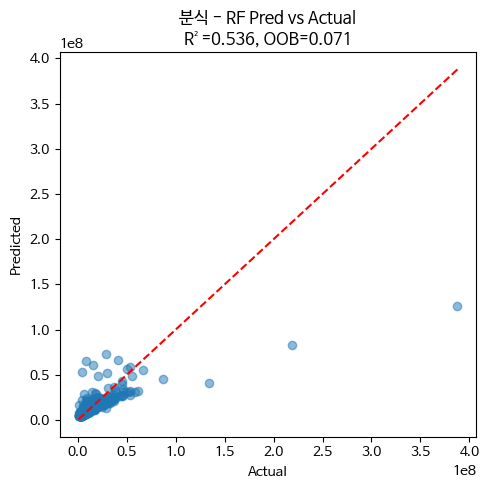


[RF + SHAP 기준 중요 변수 TOP 15]


,feature,mean_abs_shap
0,월_평균_소득_금액,2.218376e+06
1,총_상주인구_수,1.428231e+06
2,식료품_지출_총금액,5.295565e+05
3,직장인_비중(전체인구),5.265360e+05
4,문화_지출_총금액,4.995321e+05
5,의료비_지출_총금액,4.680944e+05
6,총_유동인구_수,4.208800e+05
7,집객시설_수,4.160486e+05
8,생활용품_지출_총금액,4.144280e+05
9,유동인구_비중(전체인구),3.484938e+05



--- OLS 회귀분석 (방향성 해석) ---
 - 중요 변수 Top 10: ['월_평균_소득_금액', '총_상주인구_수', '식료품_지출_총금액', '직장인_비중(전체인구)', '문화_지출_총금액', '의료비_지출_총금액', '총_유동인구_수', '집객시설_수', '생활용품_지출_총금액', '유동인구_비중(전체인구)']

 ⚠ 공선성 높아 제거됨 → 식료품_지출_총금액 (VIF=1631.93)
 ⚠ 공선성 높아 제거됨 → 문화_지출_총금액 (VIF=263.89)
 ⚠ 공선성 높아 제거됨 → 의료비_지출_총금액 (VIF=92.23)
 ⚠ 공선성 높아 제거됨 → 월_평균_소득_금액 (VIF=26.17)
 ⚠ 공선성 높아 제거됨 → 총_상주인구_수 (VIF=21.14)
 ✔ 최종 사용 변수 (5개): ['직장인_비중(전체인구)', '총_유동인구_수', '집객시설_수', '생활용품_지출_총금액', '유동인구_비중(전체인구)']
                            OLS Regression Results                            
Dep. Variable:           평균_점포당_조정_매출   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     10.35
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           1.22e-09
Time:                        04:47:52   Log-Likelihood:                -14937.
No. Observations:                 825   AIC:               

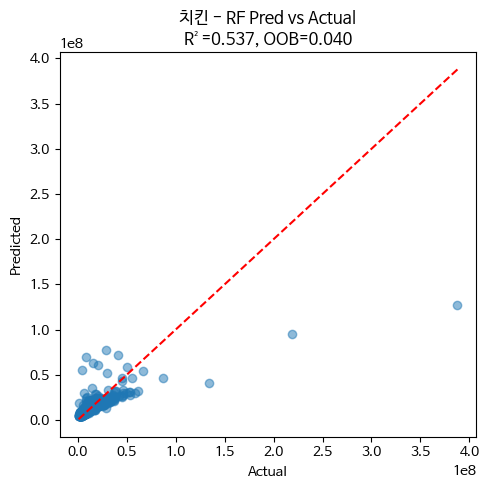


[RF + SHAP 기준 중요 변수 TOP 15]


,feature,mean_abs_shap
0,월_평균_소득_금액,2.250475e+06
1,총_상주인구_수,1.368567e+06
2,식료품_지출_총금액,6.503961e+05
3,의료비_지출_총금액,5.529199e+05
4,문화_지출_총금액,4.863054e+05
5,총_유동인구_수,4.750083e+05
6,생활용품_지출_총금액,4.626729e+05
7,직장인_비중(전체인구),4.259051e+05
8,집객시설_수,3.780479e+05
9,유동인구_비중(전체인구),3.376680e+05



--- OLS 회귀분석 (방향성 해석) ---
 - 중요 변수 Top 10: ['월_평균_소득_금액', '총_상주인구_수', '식료품_지출_총금액', '의료비_지출_총금액', '문화_지출_총금액', '총_유동인구_수', '생활용품_지출_총금액', '직장인_비중(전체인구)', '집객시설_수', '유동인구_비중(전체인구)']

 ⚠ 공선성 높아 제거됨 → 식료품_지출_총금액 (VIF=1627.38)
 ⚠ 공선성 높아 제거됨 → 문화_지출_총금액 (VIF=263.05)
 ⚠ 공선성 높아 제거됨 → 의료비_지출_총금액 (VIF=92.01)
 ⚠ 공선성 높아 제거됨 → 월_평균_소득_금액 (VIF=26.46)
 ⚠ 공선성 높아 제거됨 → 총_상주인구_수 (VIF=21.08)
 ✔ 최종 사용 변수 (5개): ['총_유동인구_수', '생활용품_지출_총금액', '직장인_비중(전체인구)', '집객시설_수', '유동인구_비중(전체인구)']
                            OLS Regression Results                            
Dep. Variable:           평균_점포당_조정_매출   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     10.26
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           1.49e-09
Time:                        04:48:38   Log-Likelihood:                -14811.
No. Observations:                 818   AIC:               

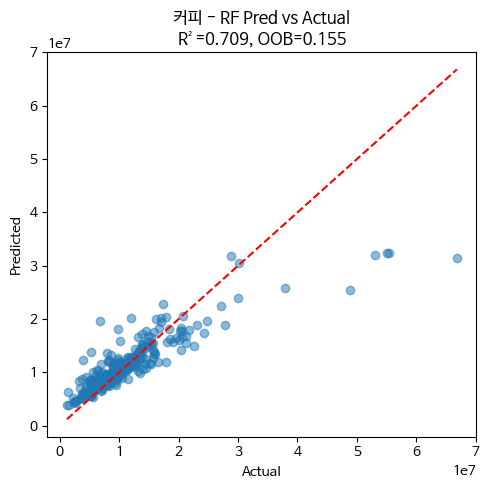


[RF + SHAP 기준 중요 변수 TOP 15]


,feature,mean_abs_shap
0,직장인_비중(전체인구),1.471370e+06
1,시간PCA_PC1,6.353517e+05
2,월_평균_소득_금액,6.159606e+05
3,연령PCA_PC1,5.944753e+05
4,총_상주인구_수,4.680730e+05
5,총_유동인구_수,4.583921e+05
6,시간PCA_PC2,3.675381e+05
7,집객시설_수,2.938171e+05
8,총_직장_인구_수,2.727631e+05
9,요일PCA_PC1,1.873266e+05



--- OLS 회귀분석 (방향성 해석) ---
 - 중요 변수 Top 10: ['직장인_비중(전체인구)', '시간PCA_PC1', '월_평균_소득_금액', '연령PCA_PC1', '총_상주인구_수', '총_유동인구_수', '시간PCA_PC2', '집객시설_수', '총_직장_인구_수', '요일PCA_PC1']

 ✔ 최종 사용 변수 (10개): ['직장인_비중(전체인구)', '시간PCA_PC1', '월_평균_소득_금액', '연령PCA_PC1', '총_상주인구_수', '총_유동인구_수', '시간PCA_PC2', '집객시설_수', '총_직장_인구_수', '요일PCA_PC1']
                            OLS Regression Results                            
Dep. Variable:           평균_점포당_조정_매출   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     9.776
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           8.18e-14
Time:                        04:48:43   Log-Likelihood:                -4572.5
No. Observations:                 266   AIC:                             9167.
Df Residuals:                     255   BIC:                             9206.
Df Model:                          10       

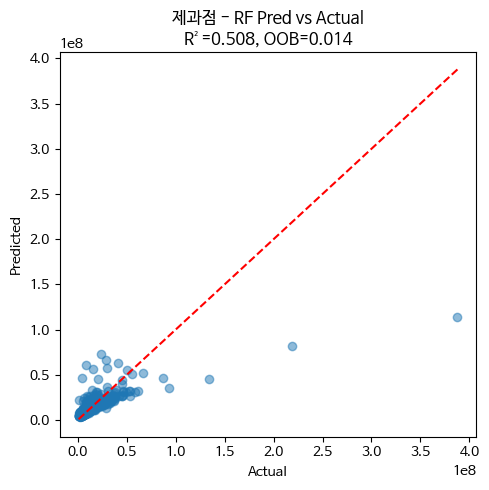


[RF + SHAP 기준 중요 변수 TOP 15]


,feature,mean_abs_shap
0,월_평균_소득_금액,2.101480e+06
1,총_상주인구_수,1.435164e+06
2,의료비_지출_총금액,8.106751e+05
3,식료품_지출_총금액,7.921475e+05
4,생활용품_지출_총금액,5.311838e+05
5,총_유동인구_수,4.914672e+05
6,문화_지출_총금액,4.145401e+05
7,집객시설_수,4.038391e+05
8,직장인_비중(전체인구),4.017807e+05
9,시간PCA_PC2,3.264337e+05



--- OLS 회귀분석 (방향성 해석) ---
 - 중요 변수 Top 10: ['월_평균_소득_금액', '총_상주인구_수', '의료비_지출_총금액', '식료품_지출_총금액', '생활용품_지출_총금액', '총_유동인구_수', '문화_지출_총금액', '집객시설_수', '직장인_비중(전체인구)', '시간PCA_PC2']

 ⚠ 공선성 높아 제거됨 → 식료품_지출_총금액 (VIF=1637.49)
 ⚠ 공선성 높아 제거됨 → 문화_지출_총금액 (VIF=257.11)
 ⚠ 공선성 높아 제거됨 → 의료비_지출_총금액 (VIF=80.41)
 ⚠ 공선성 높아 제거됨 → 총_상주인구_수 (VIF=20.74)
 ✔ 최종 사용 변수 (6개): ['월_평균_소득_금액', '생활용품_지출_총금액', '총_유동인구_수', '집객시설_수', '직장인_비중(전체인구)', '시간PCA_PC2']
                            OLS Regression Results                            
Dep. Variable:           평균_점포당_조정_매출   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     16.56
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           4.27e-18
Time:                        04:49:35   Log-Likelihood:                -15171.
No. Observations:                 839   AIC:                         3.036e+04
Df Residuals:

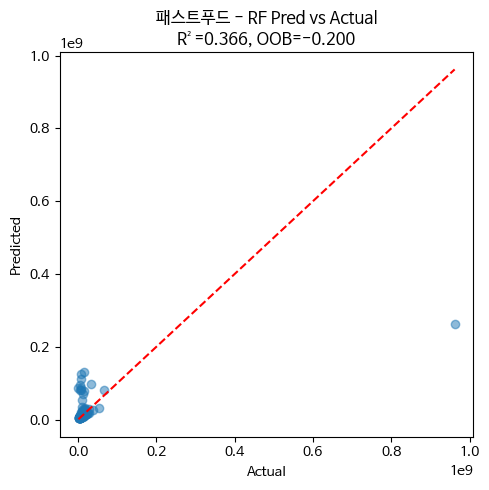


[RF + SHAP 기준 중요 변수 TOP 15]


,feature,mean_abs_shap
0,총_유동인구_수,1.223209e+07
1,직장인_비중(전체인구),1.429998e+06
2,총_직장_인구_수,1.339352e+06
3,여가_지출_총금액,1.287136e+06
4,시간PCA_PC2,1.205751e+06
5,총_상주인구_수,8.486089e+05
6,연령PCA_PC1,8.373324e+05
7,시간PCA_PC1,7.975812e+05
8,요일PCA_PC1,7.790399e+05
9,월_평균_소득_금액,6.515263e+05



--- OLS 회귀분석 (방향성 해석) ---
 - 중요 변수 Top 10: ['총_유동인구_수', '직장인_비중(전체인구)', '총_직장_인구_수', '여가_지출_총금액', '시간PCA_PC2', '총_상주인구_수', '연령PCA_PC1', '시간PCA_PC1', '요일PCA_PC1', '월_평균_소득_금액']

 ⚠ 공선성 높아 제거됨 → 총_상주인구_수 (VIF=13.49)
 ✔ 최종 사용 변수 (9개): ['총_유동인구_수', '직장인_비중(전체인구)', '총_직장_인구_수', '여가_지출_총금액', '시간PCA_PC2', '연령PCA_PC1', '시간PCA_PC1', '요일PCA_PC1', '월_평균_소득_금액']
                            OLS Regression Results                            
Dep. Variable:           평균_점포당_조정_매출   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                    0.3476
Date:                Sun, 23 Nov 2025   Prob (F-statistic):              0.957
Time:                        04:49:38   Log-Likelihood:                -3260.9
No. Observations:                 167   AIC:                             6542.
Df Residuals:                     157   BIC:                             6573.
Df Model:     

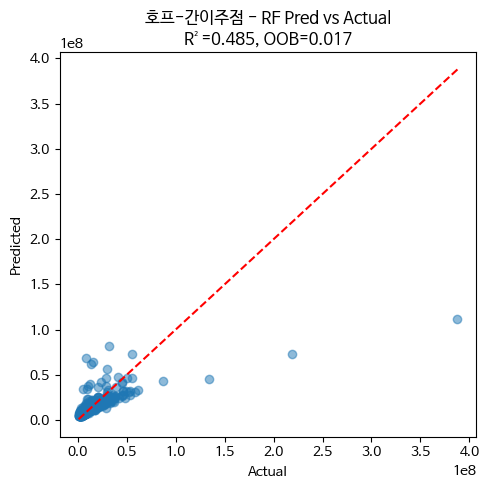


[RF + SHAP 기준 중요 변수 TOP 15]


,feature,mean_abs_shap
0,월_평균_소득_금액,2.126505e+06
1,총_상주인구_수,1.430014e+06
2,식료품_지출_총금액,8.573878e+05
3,의료비_지출_총금액,7.258538e+05
4,문화_지출_총금액,7.033707e+05
5,집객시설_수,6.127126e+05
6,총_유동인구_수,5.879692e+05
7,생활용품_지출_총금액,5.747800e+05
8,여가_지출_총금액,3.418522e+05
9,직장인_비중(전체인구),2.874014e+05



--- OLS 회귀분석 (방향성 해석) ---
 - 중요 변수 Top 10: ['월_평균_소득_금액', '총_상주인구_수', '식료품_지출_총금액', '의료비_지출_총금액', '문화_지출_총금액', '집객시설_수', '총_유동인구_수', '생활용품_지출_총금액', '여가_지출_총금액', '직장인_비중(전체인구)']

 ⚠ 공선성 높아 제거됨 → 식료품_지출_총금액 (VIF=2494.62)
 ⚠ 공선성 높아 제거됨 → 생활용품_지출_총금액 (VIF=658.51)
 ⚠ 공선성 높아 제거됨 → 문화_지출_총금액 (VIF=121.04)
 ⚠ 공선성 높아 제거됨 → 의료비_지출_총금액 (VIF=48.81)
 ⚠ 공선성 높아 제거됨 → 총_상주인구_수 (VIF=14.35)
 ✔ 최종 사용 변수 (5개): ['월_평균_소득_금액', '집객시설_수', '총_유동인구_수', '여가_지출_총금액', '직장인_비중(전체인구)']
                            OLS Regression Results                            
Dep. Variable:           평균_점포당_조정_매출   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     18.41
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           2.32e-17
Time:                        04:50:35   Log-Likelihood:                -15146.
No. Observations:                 838   AIC:                      

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import shap
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# -------------------------------------------------
# 0) 분석에 쓸 공통 피처 후보
# -------------------------------------------------
candidate_features = [
    # PCA 요약 변수
    "연령PCA_PC1", "연령PCA_PC2",
    "시간PCA_PC1", "시간PCA_PC2",
    "요일PCA_PC1",

    # 절대 규모
    "총_유동인구_수", "총_직장_인구_수", "총_상주인구_수",

    # 구조(비중/비율)
    "직장인_비중(전체인구)", "상주인_비중(전체인구)", "유동인구_비중(전체인구)",
    "상주_유동_비율",

    # 소득/지출
    "월_평균_소득_금액", "지출_총금액",
    "식료품_지출_총금액", "의류_신발_지출_총금액",
    "생활용품_지출_총금액", "의료비_지출_총금액",
    "교통_지출_총금액", "여가_지출_총금액",
    "문화_지출_총금액", "교육_지출_총금액", "유흥_지출_총금액",

    # 기타
    "집객시설_수"
]

# -------------------------------------------------
# 1) VIF 기반 공선성 제거 함수
# -------------------------------------------------
def remove_multicollinearity(X, threshold=10.0):
    X = X.copy()

    while True:
        vif = pd.DataFrame()
        vif["feature"] = X.columns
        vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        max_vif = vif["VIF"].max()
        if max_vif > threshold and len(X.columns) > 1:
            drop_feature = vif.sort_values("VIF", ascending=False)["feature"].iloc[0]
            print(f" ⚠ 공선성 높아 제거됨 → {drop_feature} (VIF={max_vif:.2f})")
            X = X.drop(columns=[drop_feature])
        else:
            break

    print(f" ✔ 최종 사용 변수 ({len(X.columns)}개): {list(X.columns)}")
    return X

# -------------------------------------------------
# 2) 업종별 RF + SHAP + OLS 통합 함수
# -------------------------------------------------
def run_rf_shap_and_ols_for_industry(
    df_pca,
    industry_name,
    target_col="평균_점포당_조정_매출",
    top_n_for_ols=10,
    random_state=42
):
    print("\n===================================")
    print(f"▶ 업종: {industry_name} — RF + SHAP + OLS 시작")
    print("===================================\n")

    # 1) 타깃 결측 제거
    df_model = df_pca[df_pca[target_col].notna()].copy()
    n_samples = len(df_model)
    print(f" - 유효 샘플 수: {n_samples}")
    if n_samples < 50:
        print(" ⚠ 샘플이 50개 미만이라 결과 해석 시 주의가 필요합니다.")

    # 2) 실제 존재하는 피처만 사용
    feature_cols = [c for c in candidate_features if c in df_model.columns]
    print(f" - 사용 피처 수: {len(feature_cols)}개")
    if len(feature_cols) == 0:
        print(" ❌ 사용 가능한 피처가 없습니다.")
        return None

    X = df_model[feature_cols].fillna(0)
    y = df_model[target_col]

    # 3) RandomForest 학습 (OOB 포함)
    rf = RandomForestRegressor(
        n_estimators=500,
        max_depth=None,
        min_samples_split=5,
        min_samples_leaf=3,
        oob_score=True,
        random_state=random_state,
        n_jobs=-1
    )
    rf.fit(X, y)

    preds = rf.predict(X)
    r2 = r2_score(y, preds)
    oob = rf.oob_score_

    print(f" - R² (train): {r2:.3f}")
    print(f" - OOB Score : {oob:.3f}")

    # 4) Actual vs Predicted 산점도
    plt.figure(figsize=(5, 5))
    plt.scatter(y, preds, alpha=0.5)
    max_val = max(y.max(), preds.max())
    min_val = min(y.min(), preds.min())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{industry_name} - RF Pred vs Actual\nR²={r2:.3f}, OOB={oob:.3f}")
    plt.tight_layout()
    plt.show()

    # 5) SHAP 값 계산 + 중요도 테이블
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(X)

    shap_abs_mean = np.abs(shap_values).mean(axis=0)
    importance_df = pd.DataFrame({
        "feature": feature_cols,
        "mean_abs_shap": shap_abs_mean
    }).sort_values("mean_abs_shap", ascending=False).reset_index(drop=True)

    print("\n[RF + SHAP 기준 중요 변수 TOP 15]")
    display(importance_df.head(15))

    # -------------------------------------------------
    # 6) OLS 회귀: 중요 변수 Top N 기반
    # -------------------------------------------------
    print("\n--- OLS 회귀분석 (방향성 해석) ---")
    top_features = importance_df["feature"].head(top_n_for_ols).tolist()
    print(f" - 중요 변수 Top {top_n_for_ols}: {top_features}\n")

    X_ols_raw = df_model[top_features].copy()

    # 공선성 제거
    X_ols = remove_multicollinearity(X_ols_raw)

    # 상수항 추가
    X_ols_const = sm.add_constant(X_ols)

    ols_model = sm.OLS(y, X_ols_const).fit()
    print(ols_model.summary())

    # 7) 결과 묶어서 반환
    result = {
        "industry": industry_name,
        "rf": rf,
        "r2": r2,
        "oob": oob,
        "explainer": explainer,
        "shap_values": shap_values,
        "importance_df": importance_df,
        "X_rf": X,
        "y": y,
        "X_ols": X_ols_const,
        "ols_model": ols_model,
    }
    return result

# -------------------------------------------------
# 3) 업종별로 한 번에 실행
# -------------------------------------------------
ols_pipeline_results = {}

# 업종별 df_pca 매핑 (이미 만든 걸 쓴다고 가정)
industry_df_map = {
    "한식": df_korean_pca
}
for ind in ["양식", "일식", "중식", "분식", "치킨",
            "커피", "제과점", "패스트푸드", "호프-간이주점"]:
    industry_df_map[ind] = results_all[ind]["pca"]

for industry_name, df_pca in industry_df_map.items():
    res = run_rf_shap_and_ols_for_industry(
        df_pca,
        industry_name,
        target_col="평균_점포당_조정_매출",
        top_n_for_ols=10
    )
    ols_pipeline_results[industry_name] = res

# 최종 결론
> RF 결론을 중점적으로 가지고 가되, 패스트푸드, 간이주점만 회귀분석으로 나온 변수들도 참고하는 형태로 가는게 이상적일 듯.

RF모델과 회귀분석 모델을 통해 도출된 업종별 변수를 쭉 비교하는 표 제작

In [ ]:
import pandas as pd
import numpy as np

def build_rf_ols_summary_table(ols_pipeline_results, top_n_rf=15):
    """
    ols_pipeline_results:
        run_rf_shap_and_ols_for_industry로 생성된 결과 딕셔너리
        { industry_name: { 'importance_df', 'ols_model', ... }, ... }

    top_n_rf:
        RF(SHAP)에서 상위 몇 개 변수까지만 요약할지 (기본 15)
    """
    rows = []

    for industry, res in ols_pipeline_results.items():
        if res is None:
            continue

        importance_df = res["importance_df"]  # RF+SHAP 결과
        ols_model = res["ols_model"]          # statsmodels OLS 결과

        # 1) RF(SHAP) 쪽 정보 정리
        # ----------------------------
        # feature, rank, mean_abs_shap
        imp = importance_df.copy()
        imp = imp.head(top_n_rf)  # 상위 N개만
        imp["rf_rank"] = np.arange(1, len(imp) + 1)
        rf_info = imp.set_index("feature")[["rf_rank", "mean_abs_shap"]]

        # 2) OLS 쪽 정보 정리
        # ----------------------------
        params = ols_model.params
        pvalues = ols_model.pvalues

        # const(절편)은 변수 목록에서 제외
        ols_features = [f for f in params.index if f != "const"]

        ols_info = pd.DataFrame({
            "feature": ols_features,
            "ols_coef": [params[f] for f in ols_features],
            "ols_pvalue": [pvalues[f] for f in ols_features],
        }).set_index("feature")

        # 유의성 flag(optional)  (p < 0.05 기준)
        ols_info["ols_sig_0_05"] = ols_info["ols_pvalue"] < 0.05

        # 3) RF와 OLS의 feature 집합 합치기
        # ----------------------------
        all_features = sorted(set(rf_info.index) | set(ols_info.index))

        for feat in all_features:
            rf_rank = rf_info.loc[feat, "rf_rank"] if feat in rf_info.index else np.nan
            mean_abs_shap = rf_info.loc[feat, "mean_abs_shap"] if feat in rf_info.index else np.nan

            ols_coef = ols_info.loc[feat, "ols_coef"] if feat in ols_info.index else np.nan
            ols_p = ols_info.loc[feat, "ols_pvalue"] if feat in ols_info.index else np.nan
            ols_sig = ols_info.loc[feat, "ols_sig_0_05"] if feat in ols_info.index else np.nan

            rows.append({
                "업종": industry,
                "변수명": feat,
                "RF_순위": rf_rank,
                "RF_mean_abs_SHAP": mean_abs_shap,
                "회귀_계수": ols_coef,
                "회귀_p값": ols_p,
                "회귀_유의(p<0.05)": ols_sig
            })

    summary_df = pd.DataFrame(rows)

    # 보기 좋게 정렬: 업종 → RF 순위 → 회귀_p값
    summary_df = summary_df.sort_values(
        by=["업종", "RF_순위", "회귀_p값"],
        ascending=[True, True, True]
    )

    return summary_df


# 실제 실행
summary_table = build_rf_ols_summary_table(ols_pipeline_results, top_n_rf=15)

# 확인
summary_table.head()

,업종,변수명,RF_순위,RF_mean_abs_SHAP,회귀_계수,회귀_p값,회귀_유의(p<0.05)
67,분식,월_평균_소득_금액,1,2.218376e+06,NaN,NaN,NaN
72,분식,총_상주인구_수,2,1.428231e+06,NaN,NaN,NaN
64,분식,식료품_지출_총금액,3,5.295565e+05,NaN,NaN,NaN
70,분식,직장인_비중(전체인구),4,5.265360e+05,2.000845e+07,0.880106,False
60,분식,문화_지출_총금액,5,4.995321e+05,NaN,NaN,NaN


In [ ]:
#이런식으로 업종별로 넣으면 최종 결론을 빠르게 볼 수 있음!! (하나하나 찾기 귀찮으면 참고)
summary_table[summary_table["업종"] == "한식"]

,업종,변수명,RF_순위,RF_mean_abs_SHAP,회귀_계수,회귀_p값,회귀_유의(p<0.05)
8,한식,월_평균_소득_금액,1,2.415529e+06,9.153005e+00,3.538959e-12,True
13,한식,총_상주인구_수,2,1.332351e+06,NaN,NaN,NaN
4,한식,식료품_지출_총금액,3,1.128212e+06,NaN,NaN,NaN
10,한식,의료비_지출_총금액,4,5.685973e+05,NaN,NaN,NaN
9,한식,유동인구_비중(전체인구),5,4.414626e+05,NaN,NaN,NaN
2,한식,생활용품_지출_총금액,6,3.997636e+05,-2.051605e-02,1.992024e-02,True
14,한식,총_유동인구_수,7,3.953415e+05,-1.307456e+00,2.866178e-01,False
7,한식,연령PCA_PC2,8,3.657180e+05,1.416807e+06,7.746146e-03,True
12,한식,집객시설_수,9,3.369678e+05,-1.107702e+05,4.276208e-03,True
6,한식,연령PCA_PC1,10,3.219368e+05,-7.024222e+05,9.621995e-02,False
